# Eksplorasi Data Analisis Airbnb Bangkok
Dibuat untuk memenuhi tugas Capstone Modul 2, di Purwadhika Digital Technology School. Dikerjakan oleh Satrio Bagus Prabowo, (JCDS 2602, BSD)


---
# Roleplay
Sebuah divisi Relasi Kustomer dari Airbnb mencoba untuk memberikan rekomendasi tempat menginap khusus wisatawan-wisatawan yang akan berkunjung ke Bangkok, Thailand. Divisi ini akan mengolah data penginapan dan/atau hotel yang ada di Airbnb di kota Bangkok, sehingga nantinya bisa memberikan informasi dan rekomendasi tentang penginapan bagi wisatawan-wisatawan yang hendak berlibur atau menetap di Bangkok.

# Latar Belakang Masalah
Thailand mengalami lonjakan wisatawan pada Januari 2025. Menurut data dari [CEIC Data - Kunjungan Wisatawan Thailand](https://www.ceicdata.com/id/indicator/thailand/visitor-arrivals) (diakses tanggal 17 Maret 2025), kunjungan wisatawan Thailand dilaporkan sebesar 3,709,102 orang pada Bulan Januari 2025 (naik dibanding sebelumnya yaitu 3,627,441 Orang untuk Desember 2025). Untuk itu, sebuah divisi relasi kustomer di perusahaan Airbnb mencoba membantu para wisatawan ini dengan memberikan rekomendasi-rekomendasi pilihan penginapan, khususnya di kota Bangkok, Thailand.

    # Pernyataan Masalah
Divisi Relasi Kustomer ini akan mencari hotel dan/atau penginapan yang akan dijadikan rekomendasi-rekomendasi untuk wisatawan. Adapun beberapa faktor yang dipertimbangkan dalam pemilihan tempat-tempat ini adalah:
1. Jarak dengan tempat-tempat wisata di kota Bangkok.

Faktor jarak ini bisa menjadi faktor yang dipertimbangkan dalam pemilihan lokasi penginapan. Hal ini didasari pada tempat-tempat yang ingin dituju oleh para wisatawan ini.

2. Harga penginapan

Harga juga menjadi faktor krusial dalam penentuan pemilihan penginapan. Apakah sesuai dengan budget yang diinginkan atau tidak.

3. Tipe penginapan dan/atau hotel.

Tipe penginapan cukup dirasa penting sebaagai hal yang dicari oleh wisatawan. Hal ini berkaitan dengan kenyamanan lokasi menginap. Apakah wisatawan mau untuk berbagi ruangan dengan orang lain atau tidak.

---
# Data
---
Berikut adalah pengolahan data untuk menjawab permasalahan

In [525]:
#Instalasi Geopy dibutuhkan untuk nantinya dipakai mengukur jarak suatu tempat ke tempat lain
# pip install geopy

In [526]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import warnings
warnings.filterwarnings('ignore')


In [527]:
#Mengambil data Raw
df_raw=pd.read_csv("Airbnb Listings Bangkok.csv")
df_raw

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


# Penjelasan Kolom-Kolom yang Ada Pada Data
1. id = Identitas unik dari hotel/pengingapan.
2. name = Nama dari hotel/pengingapan.
3. host_id = Identitas unik dari pemilik hotel/penginapan.
4. neighborhood = Lingkungan tempat hotel/penginapan secara geografis berdasarkan data lingkungan shapefile digital secara terbuka atau publik.
5. latitude = Menggunakan proyeksi World Geodetic System (WGS84) untuk garis lintang.
6. longitude = Menggunakan proyeksi World Geodetic System (WGS84) untuk garis bujur.
7. room_type = Terdapat empat tipe ruangan atau penginapan, yaitu:

    a. Entire Place (Seluruh rumah/apartemen) = Cocok bagi tamu yang mencari "rumah kedua". Dengan jenis ini, tamu akan memiliki seluruh tempat untuk diri mereka sendiri, termasuk kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah. Host harus mencantumkan dalam deskripsi jika mereka akan berada di properti tersebut atau tidak (contoh: "Host tinggal di lantai pertama rumah") dan memberikan detail lebih lanjut tentang tempat penginapan.

    b. Private Rooms (Kamar pribadi) = Pilihan ini cocok untuk tamu yang menginginkan privasi tetapi tetap ingin merasakan koneksi lokal. Saat memesan kamar pribadi, tamu akan memiliki kamar pribadi untuk tidur tetapi mungkin berbagi beberapa ruang dengan orang lain. Tamu mungkin harus melewati ruang dalam yang digunakan oleh tuan rumah atau tamu lain untuk mencapai kamar mereka.

    c. Shared Rooms (Kamar bersama) = Pilihan ini cocok bagi tamu yang tidak keberatan berbagi ruang dengan orang lain. Saat memesan kamar bersama, tamu akan tidur di ruang yang juga digunakan oleh orang lain dan berbagi seluruh ruang dengan penghuni lainnya. Kamar bersama populer di kalangan wisatawan fleksibel yang mencari teman baru dan penginapan hemat biaya.

    d. Hotel = Kamar Hotel.
8. price = Harga harian dalam mata uang lokal. Perhatikan bahwa simbol "$" mungkin digunakan meskipun lokasi berbeda.
9. minimum_nights = Jumlah malam minimum untuk menginap di hotel/penginapan tersebut (aturan kalender dapat berbeda).
10. number_of_reviews = Jumlah ulasan yang dimiliki oleh listing tersebut.
11. last_review = Tanggal ulasan terbaru pada listing.
12. calculated_host_listings_count = Jumlah listing yang dimiliki oleh host di wilayah geografis kota/region tertentu berdasarkan data saat ini.
13. availability_365 = Ketersediaan listing selama x hari ke depan berdasarkan kalender. Perlu dicatat bahwa listing mungkin tidak tersedia karena telah dipesan oleh tamu atau diblokir oleh host.
14. number_of_reviews_ltm = Jumlah ulasan yang diterima listing dalam 12 bulan terakhir.

In [528]:
#Memastikan kolom data "price" tidak memiliki symbol Dollar ($) seperti yang dijelaskan pada bagian penjelasan nomor 8
contains_dollar = df_raw['price'].astype(str).str.contains(r'\$')
rows_with_dollar = df_raw[contains_dollar]
rows_with_dollar.count()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

---
# Proses Pembersihan Data
---
Proses pembersihan data adalah sebuah proses untuk merapikan dan membersihkan data-data yang tersedia. Proses pembersihan data ini meliputi:
1. Memperbaiki data-data yang tidak ada (none).
2. Memperbaiki data-data yang duplikat.
3. Memperbaiki tipe-tipe datanya.
4. Membuang kolom yang tidak diperlukan.

## 1. Memperbaiki Data Yang Tidak Ada

In [529]:
#Mengecek mana saja kolom yang mempunyai nilai None
df_clean=df_raw
df_clean.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Dari hasil di atas, terlihat beberapa kolom mempunyai data-data yang kosong, yaitu:
- kolom name mempunyai 8 data kosong.
- kolom host_name mempunyai 1 data kosong.
- kolom last_review mempunyai 5790 data kosong.
- kolom reviews_per_month mempunyai 5790 data kosong.

Proses mengisi data-data yang kosong
1. Kolom `name` diisi dengaan "Unknown" karena nama dari penginapan ini tidak diketahui.
2. Kolom `host_name` diisi juga dengan "Unknown" karena nama pemilik juga tidak diketahui.
3. Kolom `last_review` diisi dengan tanda strip ("-") karena dianggap tidak memiliki review.
4. Kolom `reviews_per_month` diisi dengan angka nol (0) karena dianggap tidak memiliki review, maka rata-rata review per bulannya juga nol (0).

In [530]:
#Mengisi 8 kolom name yang kosong dengan "Unknown"
df_clean["name"]=df_clean["name"].fillna(value="Unknown")

In [531]:
#Mengisi 1 kolom host_name yang kosong dengan "Unknown"
df_clean["host_name"]=df_clean["host_name"].fillna(value="Unknown")

In [532]:
#Mengisi 5790 kolom last_review yang kosong dengan "-"
df_clean["last_review"]=df_clean["last_review"].fillna(value="-")
df_clean["reviews_per_month"]=df_clean["reviews_per_month"].fillna(value=0)

In [533]:
#Mengisi 5790 kolom last_review yang kosong dengan angka 0
df_clean["reviews_per_month"]=df_clean["reviews_per_month"].fillna(value=0)

In [534]:
#Mengecek kembali data-data yang sudah diisi
df_clean.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## 2. Memperbaiki Data Yang Duplikat

In [535]:
#Mengecek mana saja baris yang terindikasi duplikat
df_clean.duplicated().sum()

0

Setelah dilakukan pengecekan terhadap data, ternyata tidak ada data yang terindikasi duplikat. Maka dari itu, pembersihan data bisa masuk ke tahap selanjutnya

## 3. Memperbaiki tipe-tipe datanya

In [536]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Dari informasi yang ada di atas, terlihat beberapa tipe data yang perlu dilakukan perubahan, yaitu:
1. kolom `id` diubah menjadi tipe data object 
2. kolom `host_id` diubah menjadi tipe data object 
3. kolom `neighbourhood` diubah menjadi tipe data category 
4. kolom `room_type` diubah menjadi tipe data category


Pada informasi di atas juga terlihat kolom `last_review` perlu diganti ke tipe data date time. Tapi karena `last_review` terdapat data yang kosong dan diisi dengan tanda strip (-), maka tidak diganti ke date time saat ini. pergantiannya akan dilakukan jika diperlukan untuk proses pengolahan data. Jika tidak diperlukan, maka akan tetap bertipe object.

In [537]:
#Merubah tipe-tipe data
df_clean["id"]=df_clean["id"].astype("object")
df_clean["host_id"]=df_clean["host_id"].astype("object")
df_clean["neighbourhood"]=df_clean["neighbourhood"].astype("category")
df_clean["room_type"]=df_clean["room_type"].astype("category")

In [538]:
#Cek pergantian tipe data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      15854 non-null  int64   
 1   id                              15854 non-null  object  
 2   name                            15854 non-null  object  
 3   host_id                         15854 non-null  object  
 4   host_name                       15854 non-null  object  
 5   neighbourhood                   15854 non-null  category
 6   latitude                        15854 non-null  float64 
 7   longitude                       15854 non-null  float64 
 8   room_type                       15854 non-null  category
 9   price                           15854 non-null  int64   
 10  minimum_nights                  15854 non-null  int64   
 11  number_of_reviews               15854 non-null  int64   
 12  last_review       

## 4. Membuang kolom yang tidak diperlukan

In [539]:
df_clean.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,-,0.00,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,-,0.00,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,-,0.00,3,365,0


Terilihat kolom `Unnamed: 0` sama saja dengan index. maka dari itu, kolom tersebut dianggap tidak diperlukan dan bisa dibuang

In [540]:
#proses membuang kolom Unnamed: 0
df_clean = df_clean.drop(columns="Unnamed: 0")

In [541]:
#cek kembali data yang sudah dibersihkan
df_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0.00,14,365,0


---
# Proses Eksplorasi Data Analisis
---

Proses ini diperlukan untuk menjawab permasalahan-permasalahan yang sudah dijelaskan di atas

## 1. Mencari Rekomendasi dari Jarak Tempat-Tempat Wisata Bangkok.
Pada bagian ini dipilih lima (5) tempat wisata dengan nilai tertinggi di Bangkok. Pemilihan ini berdasar pada pranala situs [Tourism Thailand](https://www.tourismthailand.org/Destinations/Provinces/Bangkok/219) (diakses tanggal 20 Maret 2025). Diambil 5 tempat dengan alasan bahwa wisatawan biasanya tidak hanya datang untuk ke satu tempat. Sehingga ini bisa menjadi pilihan bagi mereka menentukan Penginapan.
1. Wat Pho (Temple of the Reclining Buddha)

Wat Pho adalah salah satu kuil tertua dan terbesar di Bangkok, terkenal dengan patung Buddha berbaring raksasa sepanjang 46 meter yang dilapisi emas. Kuil ini juga dianggap sebagai tempat kelahiran pijat tradisional Thailand dan memiliki sekolah pengobatan tradisional.

2. Wat Saket

Wat Saket adalah  kuil yang terletak di atas bukit buatan manusia. Pengunjung dapat menaiki tangga spiral untuk mencapai puncaknya, di mana terdapat stupa emas besar dan pemandangan kota Bangkok yang indah.

3. Chatuchak Weekend Market

Chatuchak adalah pasar akhir pekan terbesar di dunia, dengan lebih dari 15.000 kios yang menjual berbagai barang, mulai dari pakaian, kerajinan tangan, makanan, hingga tanaman. Pasar ini menjadi daya tarik utama bagi wisatawan dan penduduk lokal karena suasananya yang ramai dan beragamnya pilihan barang.

4. Night Market Ratchada

Night Market Ratchada, yang kini dikenal sebagai Jod Fair Ratchada, adalah salah satu pasar malam paling populer di Bangkok. Terkenal dengan suasana yang ramai, makanan street food lezat, dan deretan kios unik, tempat ini menjadi destinasi favorit wisatawan dan penduduk lokal.

5. Wat Arun

Wat Arun, atau Temple of Dawn, adalah salah satu kuil paling ikonik di Bangkok, terkenal dengan arsitektur megahnya yang berhiaskan mosaik porselen berwarna-warni. Kuil ini terletak di tepi Sungai Chao Phraya dan menawarkan pemandangan indah, terutama saat matahari terbenam.

Dari kelima tempat tersebut, dicari jarak masing-masing tempat tersebut ke tempat penginapan yang ada di data. Sehingga nantinya bisa dibuat dalam bentuk rata-rata jarak dari penginapan ke tiga tempat tersebut.

Disinilah, *library* `Geopy` hadir dengan fungsi `Geodesic`. `Geodesic`, yang disediakan oleh `Geopy` dalam Python, adalah metode yang akurat untuk menghitung jarak terpendek antara dua titik di permukaan bumi, dengan mempertimbangkan kelengkungan bumi. Dalam konteks analisis data lokasi, seperti menghitung jarak penginapan dengan tempat wisata di Bangkok, `Geodesic` sangat berguna karena memberikan hasil jarak terdekat. Untuk lebih lengkapnya, bisa dlihat pada dokumentasi `Geopy` pada tautan [dokumentasi Geopy](https://geopy.readthedocs.io/en/stable/) (diakses tanggal 20 Maret 2025).

Pada data yang ada, tersedia titik koordinat (longitude dan latitude) dari masing-masing penginapan. Maka yang diperlukan saat ini adalah titik koordinat dari tiap-tiap tempat wisata. Titik-titik kordinat tempat wisata bisa diambil dari Google Maps sehingga kredibilitas keakuratannya bisa dipertanggung-jawabkan

In [542]:
#Titik Tempat Wisata
Kordinat_WatPho = (13.746504613119459, 100.4927764212556)
Kordinat_WatSaket = (13.754113795247854, 100.50651370909384)
Kordinat_Chatuchak = (13.80450672515097, 100.54994554533069)
Kordinat_Ratchada = (13.767920187968393, 100.56880145767134)
Kordinat_WatArun = (13.744233817988352, 100.48841623410846)

In [543]:
# Fungsi untuk menghitung jarak terdekat
def calculate_distance(row,kor):
    location_coords = (row['latitude'], row['longitude'])
    return geodesic(location_coords, kor).kilometers

# Menambahkan kolom jarak ke masing-masing tempat wisata
df_clean["Jarak_WatPho"] = df_clean.apply(lambda row: calculate_distance(row, Kordinat_WatPho), axis =1)
df_clean["Jarak_WatSaket"] = df_clean.apply(lambda row: calculate_distance(row, Kordinat_WatSaket), axis =1)
df_clean["Jarak_Chatuchak"] = df_clean.apply(lambda row: calculate_distance(row, Kordinat_Chatuchak), axis =1)
df_clean["Jarak_Ratchada"] = df_clean.apply(lambda row: calculate_distance(row, Kordinat_Ratchada), axis =1)
df_clean["Jarak_WatArun"] = df_clean.apply(lambda row: calculate_distance(row, Kordinat_WatArun), axis =1)
df_clean.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Jarak_WatPho,Jarak_WatSaket,Jarak_Chatuchak,Jarak_Ratchada,Jarak_WatArun
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,...,2020-01-06,0.50,2,353,0,5.455065,3.819071,5.029745,3.101729,5.978084
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,...,-,0.00,2,358,0,15.965427,15.249491,16.723614,12.192474,16.231961
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,...,-,0.00,1,365,0,14.208571,12.709653,9.874184,6.216038,14.692883
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,...,2022-04-01,0.03,1,323,1,9.785309,8.078287,3.036817,2.283484,10.319621
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,...,-,0.00,3,365,0,15.403113,13.814735,9.852570,6.984171,15.909710


Setelah mendapatkan jarak dari hotel/penginapan ke tiap-tiap tempat wisata, pengelompakan selanjutnya adalah mengukur rata-rata jarak dari kelima tempat wisata. Rata-rata diambil karena mengingat jarak tempuh secara nyata akan dilakukan oleh wisatawan ke semua tempat wisata. Namun tidak memakai total jarak, karena ada asumsi tempat wisata yang tidak ingin dikunjungi.

Jadi nilai rata-rata jarak ke lima tempat wisata akan dipilih berdasarkan nilai terdekat, untuk kemudian bisa dibuat pengelompokan dan menjadi rekomendasi

In [544]:
#Menambah jarak rata-rata ke lima tempat wisata
df_clean["Jarak_rata-rata"]= (df_clean["Jarak_WatPho"]+df_clean["Jarak_WatSaket"]+df_clean["Jarak_Chatuchak"]+df_clean["Jarak_WatArun"]+df_clean["Jarak_Ratchada"])/5
df_clean.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Jarak_WatPho,Jarak_WatSaket,Jarak_Chatuchak,Jarak_Ratchada,Jarak_WatArun,Jarak_rata-rata
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,...,0.50,2,353,0,5.455065,3.819071,5.029745,3.101729,5.978084,4.676739
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,...,0.00,2,358,0,15.965427,15.249491,16.723614,12.192474,16.231961,15.272593
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,...,0.00,1,365,0,14.208571,12.709653,9.874184,6.216038,14.692883,11.540266
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,...,0.03,1,323,1,9.785309,8.078287,3.036817,2.283484,10.319621,6.700704
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,...,0.00,3,365,0,15.403113,13.814735,9.852570,6.984171,15.909710,12.392860


Setelah mendapatkan jarak-jarak tersebut (termasuk jarak rata-rata). Berikutnya mengelompokkan ke dataframe baru. Hal ini berguna untuk melihat lebih detail dari tiap-tiap hal yang ingin dieksplorasi.

In [545]:
#Membuat DF baru untuk masing-masing jaraknya
#DF untuk Jarak_WatPho
dfJarak_WatPho_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatSaket", "Jarak_Chatuchak","Jarak_Ratchada", "Jarak_WatArun", "Jarak_rata-rata"]

dfJarak_WatPho_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_WatPho_all

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,5.455065
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,15.965427
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,14.208571
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,9.785309
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,15.403113
...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,17.722339
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,5.023239
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,5.021070
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,5.056566


Langkah berikutnya setelah mendapatkan dataframe tentang jarak Wat Pho adalah mencari 10 penginapan dengan jarak terdekat dari tempat wisata Wat Pho tersebut. Diambil 10 saja untuk mengkerucutkan rekomendasi sehingga pilihan tidak menjadi sulit

In [546]:
#mengurutkan mana yang terdekat, dan diambil 10 saja
dfJarak_WatPho_all = dfJarak_WatPho_all.sort_values(by="Jarak_WatPho")
dfJarak_WatPho = dfJarak_WatPho_all.head(10)
dfJarak_WatPho

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho
2799,16472217,RALPH Bangkok,108105612,Ralph,Phra Nakhon,13.74602,100.49224,Hotel room,450,1,0.078996
8058,35276142,Tha tien flat,265577755,Nid,Phra Nakhon,13.74830,100.49300,Entire home/apt,2700,1,0.200103
13264,660480154818347286,"Thewet Hideaway, the White bedroom.",234732854,Taraa Adrianne,Phra Nakhon,13.74684,100.49587,Private room,3000,1,0.336626
7210,33047916,246 House Family BR Walk to Grand Palace & Wat...,248201804,Patanee,Phra Nakhon,13.74688,100.49618,Private room,1857,1,0.370437
11881,51084340,Family room near Grand Palace,185769400,Dashell,Phra Nakhon,13.74632,100.49632,Entire home/apt,1000,1,0.383787
7188,33024940,246 House KingBR Walk to Grand Palace & Wat Pho,248201804,Patanee,Phra Nakhon,13.74853,100.49624,Private room,914,1,0.436498
11461,47085294,Sabai Sabai Houseboat BKK Priv. Bathr.Cabin,354561299,Roger,Phra Nakhon,13.75055,100.49306,Private room,1800,1,0.448619
4460,22710227,Best Quality BED& BREAKFAST in old town,14391623,Sasi,Phra Nakhon,13.74754,100.49679,Shared room,350,1,0.448934
4601,23170159,Bed+ Full Breakfast Free early check after7.00AM,14391623,Sasi,Phra Nakhon,13.74750,100.49698,Hotel room,350,1,0.467770
3533,19627495,Private Quad shared Bath** FULL BREAKFAST**,14391623,Sasi,Phra Nakhon,13.74812,100.49682,Hotel room,1565,1,0.472427


Setelah mendapatkan 10 tempat yang terdekat, dari data ini bisa dilakukan pembuktian dengan visualisasi map menggunakan *library* Folium.

In [547]:
import folium

In [548]:
#Membuat peta berdasarkan lokasi penginapan dan tempat wisata Wat Pho
#Lokasi penginapan menggunakan warna merah
#Lokkasi Wat Pho menggunakan warna biru
world = folium.Map(location=[Kordinat_WatPho[0], Kordinat_WatPho[1]], zoom_start=17.5)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_WatPho.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Jarak ke Wat Pho: {row["Jarak_WatPho"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatPho[0],Kordinat_WatPho[1]], icon=folium.Icon(color="blue"), popup="Wat Pho", tooltip="Wat Pho").add_to(marker_cluster)
world

Insight:
1. Dari 10 penginapan yang terdekat, seluruh jaraknya tidak lebih dari 0,5 km.
2. Penginapan dengan nama RALPH Bangkok menjadi yang terdekat dari Wat Pho dengan jarak sekitar 70 meter saja. Penginapan ini bertipe hotel room, cocok untuk digunakan bagi wisatawan yang ingin mendapat kenyamanan ruangan hotel dan dekat dengan Wat Pho.

Selanjutnya dilakukan pengembangan data serupa untuk mencari insight dari titik tempat Wat Saket. Sama seperti pencarian Wat Pho, bagian ini juga akan diambil 10 yang terdekat

In [549]:
#DF untuk Jarak_WatSaket
dfJarak_WatSaket_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatPho", "Jarak_Chatuchak", "Jarak_Ratchada", "Jarak_WatArun", "Jarak_rata-rata"]

dfJarak_WatSaket_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_WatSaket_all = dfJarak_WatSaket_all.sort_values(by="Jarak_WatSaket")
dfJarak_WatSaket = dfJarak_WatSaket_all.head(10)
dfJarak_WatSaket

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatSaket
867,5908165,Bunk bed in Female Dormitory,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75341,100.50651,Shared room,550,1,0.077867
4241,22217367,Family 8 beds room (2nd),30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75330,100.50617,Private room,3200,1,0.097407
1517,9534453,Family 4 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75312,100.50638,Private room,2900,1,0.110897
805,6506565,Family 8 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75305,100.50612,Private room,3200,1,0.125160
1317,9617839,Bunk Bed in Mixed Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75384,100.50510,Shared room,1000,1,0.155862
8719,37849267,Family Room for 3 at khaosan road hotel+ Break...,8444643,Kiattisak,Phra Nakhon,13.75479,100.50519,Private room,1999,1,0.161526
1318,9618414,Bunk Bed in Female Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75365,100.50483,Shared room,1000,1,0.189182
5582,27499440,"Tawan Vacation Home, Fifth Floor Luxury Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75592,100.50648,Private room,2424,1,0.199866
5516,27452817,"Tawan Vacation Home, 4th Floor Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75597,100.50614,Private room,2424,1,0.209304
5606,28263736,อพาร์ทเมนต์หนึ่งห้องนอนที่เงียบสงบและกว้างขวาง,213471505,Jim,Pom Prap Sattru Phai,13.75617,100.50606,Private room,2597,1,0.232724


In [550]:
#Membuat peta berdasarkan lokasi penginapan dan tempat wisata Wat Saket
#Lokasi penginapan menggunakan warna merah
#Lokasi Wat Saket menggunakan warna biru
world = folium.Map(location=[Kordinat_WatSaket[0], Kordinat_WatSaket[1]], zoom_start=17.5)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_WatSaket.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Jarak ke Wat Saket: {row["Jarak_WatSaket"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatSaket[0],Kordinat_WatSaket[1]], icon=folium.Icon(color="blue"), popup="Wat Saket", tooltip="Wat Saket").add_to(marker_cluster)
world

Insight:
1. Dari 10 penginapan yang terdekat, seluruh jaraknya tidak lebih dari 250 meter.
2. Penginapan dengan nama Bunk bed in Female Dormitory menjadi yang terdekat dari Wat Saket dengan jarak sekitar 70 meter saja. Penginapan ini bertipe Shared room sehingga jika menginap disini, bisa jadi berbarengan dengan orang lain. Perlu diingat, Female Dormitory hanya boleh diisi oleh wisatawan wanita saja.
---

In [551]:
#DF untuk Jarak_Chatuchak
dfJarak_Chatuchak_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatPho", "Jarak_WatSaket","Jarak_Ratchada", "Jarak_WatArun", "Jarak_rata-rata"]

dfJarak_Chatuchak_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_Chatuchak_all = dfJarak_Chatuchak_all.sort_values(by="Jarak_Chatuchak")
dfJarak_Chatuchak = dfJarak_Chatuchak_all.head(10)
dfJarak_Chatuchak

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Chatuchak
8888,38759420,Line MRT BTS 1min One bedroom,287988340,Best Center,Chatu Chak,13.80217,100.55313,Entire home/apt,1000,365,0.430574
8739,37888349,"1BR Citycentral Apt, chatuchak weekend market",20272648,Grischtana,Chatu Chak,13.79985,100.54954,Entire home/apt,2078,1,0.517071
8861,38058605,"Excellent location, best facilities ,worth to pay",13625199,Jidapa,Chatu Chak,13.80545,100.55490,Private room,1200,30,0.545769
11246,45062866,The Line Jatujak | 27th Flr with huge park view,62171292,Suvit,Chatu Chak,13.80550,100.55552,Entire home/apt,3500,30,0.612671
5167,25421225,★BTS Mochit★MRT/VVIPGarden/JJ Market/5Star/Pool,121366207,Lily,Chatu Chak,13.80590,100.55543,Entire home/apt,1479,20,0.612711
6581,30917831,"Hot Deal 5BR Entire Villa 7Bath BTS/MRT, JJ MA...",231041483,Piti,Chatu Chak,13.80160,100.55495,Entire home/apt,7250,1,0.629460
7449,33467112,"Stylish&Comfy Room,190m JJ mkt,near 7-11,BTS &...",14751074,Kannika,Chatu Chak,13.79880,100.55135,Entire home/apt,1129,20,0.649383
11691,49957878,The best view in Bangkok with largest park & shop,62211407,May,Chatu Chak,13.80487,100.55600,Entire home/apt,120000,25,0.655868
4610,23213539,"Excellent location, cosy and luxurious apartment",171717553,Thomas,Chatu Chak,13.80513,100.55613,Entire home/apt,900,90,0.672238
14960,756853635282313505,Condo M Chatuchak\n33 sqm.\n29th floors\nConta...,421505375,เกวลิน,Chatu Chak,13.79877,100.55214,Private room,18000,1,0.677599


In [552]:
#Membuat peta berdasarkan lokasi penginapan dan tempat wisata Chatuchak
#Lokasi penginapan menggunakan warna merah
#Lokasi Chatuchak menggunakan warna biru
world = folium.Map(location=[Kordinat_Chatuchak[0], Kordinat_Chatuchak[1]], zoom_start=17.5)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_Chatuchak.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Jarak ke Chatuchak: {row["Jarak_Chatuchak"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_Chatuchak[0],Kordinat_Chatuchak[1]], icon=folium.Icon(color="blue"), popup="Chatuchak", tooltip="Chatuchak").add_to(marker_cluster)
world

Insight:
1. Dari 10 penginapan yang terdekat, jaraknya masih di bawah 1 km.
2. Penginapan terdekat berjarak sekitar 400 meter ke Chatuchak.
3. Menariknya, berdasarkan hasil visualisasi peta, penginapan-penginapan di dekat Chatuchak ini sangat dekat dengan stasiun MRT kota Bangkok sehingga memudahkan mobilitas untuk para wisatawan yang hendak bepergian ke tempat lain.
---

In [553]:
#df untuk jarak Ke Ratchada
dfJarak_Ratchada_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatPho", "Jarak_WatSaket","Jarak_Chatuchak", "Jarak_WatArun", "Jarak_rata-rata"]

dfJarak_Ratchada_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_Ratchada_all = dfJarak_Ratchada_all.sort_values(by="Jarak_Ratchada")
dfJarak_Ratchada = dfJarak_Ratchada_all.head(10)
dfJarak_Ratchada

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Ratchada
14009,710671150283361091,全新打造時尚寬敞客房,13937695,Sandy,Din Daeng,13.76819,100.568920,Private room,3886,1,0.032487
11902,52941133,"8 mins to subway,-surrounding Street food & Ma...",169762534,Mai,Din Daeng,13.76881,100.568790,Private room,550,28,0.098454
13935,710424933221702207,由泰國著名設計師一手打造 鄰近地鐵交通便利,13937695,Sandy,Din Daeng,13.76882,100.569080,Private room,1483,1,0.104010
9598,40638585,VK mansion (5 minute walk to MRT) 1,303038382,Voravich,Din Daeng,13.76842,100.567980,Private room,650,1,0.104639
9285,39451281,VK mansion 5 minute walk to MRT 2,303038382,Voravich,Din Daeng,13.76855,100.568060,Private room,750,1,0.106229
7025,32345183,"Condo 19th floor, great views, swimming pool",10439408,Jorge,Din Daeng,13.76904,100.569080,Entire home/apt,800,3,0.127502
10079,41553510,MRT cultural center for 8 beds private bathroom,83715635,Wang,Din Daeng,13.76910,100.569038,Private room,2900,3,0.133028
2439,15117241,Newly renovated Loft style Studio,7511122,Kub (Ratha),Din Daeng,13.76919,100.568980,Entire home/apt,1000,1,0.141809
13398,678711576729555748,Foyum home,431410543,Rewat,Din Daeng,13.76912,100.569380,Private room,15000,1,0.146749
9307,39481116,超现代主义No.5/火车头夜市/四面佛/大皇宫,219301393,Jack,Din Daeng,13.76722,100.570210,Entire home/apt,700,365,0.170889


In [554]:
#Membuat peta berdasarkan lokasi penginapan dan tempat wisata Ratchada
#Lokasi penginapan menggunakan warna merah
#Lokasi Ratchada menggunakan warna biru
world = folium.Map(location=[Kordinat_Ratchada[0], Kordinat_Ratchada[1]], zoom_start=17.5)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_Ratchada.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Jarak ke Ratchada: {row["Jarak_Ratchada"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_Ratchada[0],Kordinat_Ratchada[1]], icon=folium.Icon(color="blue"), popup="Ratchada", tooltip="Ratchada").add_to(marker_cluster)
world

In [555]:
#Tambahan untuk menarik insight lebih detail
dfJarak_Ratchada["Jarak_Ratchada"].describe()

count    10.000000
mean      0.116580
std       0.037556
min       0.032487
25%       0.104167
50%       0.116865
75%       0.139614
max       0.170889
Name: Jarak_Ratchada, dtype: float64

Insight:
1. Dari 10 penginapan yang terdekat, jaraknya terbilang sangat dekat. Dengan rata-rata dari sepuluh tempat ini berjarak hanya 100 meter.
2. Penginapan terdekat milik Host Sandy berjarak sekitar 30 meter ke Ratchada. Perlu diingat, Ratchada adalah sebuah pasar malam yang sangat populer. Ini berarti mungkin saja akan mengganggu waktu istirahat di malam hari. Tapi jika berbicara tentang akses ini bisa menjadi poin positif karena jaraknya yang sangat dekat.
---

In [556]:
#df untuk jarak Ke Wat Arun
dfJarak_WatArun_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatPho", "Jarak_WatSaket","Jarak_Chatuchak", "Jarak_Ratchada", "Jarak_rata-rata"]

dfJarak_WatArun_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_WatArun_all = dfJarak_WatArun_all.sort_values(by="Jarak_WatArun")
dfJarak_WatArun = dfJarak_WatArun_all.head(10)
dfJarak_WatArun

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatArun
11929,51188340,Family Room2:\n 2 Beds\n1 Bath Room,314058088,Sutachada,Bangkok Yai,13.742800,100.486930,Private room,1550,1,0.225836
11930,51188734,Deluxe Room1: Double Beds,314058088,Sutachada,Bangkok Yai,13.742960,100.486380,Private room,600,1,0.261458
6634,31434789,Living inside Bangkok temple and canal life,175446488,Ohm,Bangkok Yai,13.745250,100.485130,Private room,950,1,0.372771
13678,686595904154891156,"ArunHome, Bangkok, WatArun/ MRT/Private House",114982054,DrSettachai,Bangkok Yai,13.745357,100.485143,Private room,2043,1,0.375168
6188,30259203,"BaanArun, Bangkok NearMRT Itsaraphap/Private h...",114982054,DrSettachai,Bangkok Yai,13.744160,100.484710,Private room,2390,1,0.400921
11823,50858659,Live like a local at Bangkok old town,314058088,Sutachada,Bangkok Yai,13.741930,100.485360,Entire home/apt,3800,1,0.417402
7128,32861787,Whole House/4Bedrooms/ Experience Local Life,175446488,Ohm,Bangkok Yai,13.746630,100.485260,Entire home/apt,2551,1,0.432207
6635,31435513,Whole House/Experience temple and canal life,175446488,Ohm,Bangkok Yai,13.745180,100.484320,Entire home/apt,2400,1,0.455217
2799,16472217,RALPH Bangkok,108105612,Ralph,Phra Nakhon,13.746020,100.492240,Hotel room,450,1,0.458339
6956,32180166,Canal Side with Authentic Thai food Next Door,94668537,Title,Bangkok Yai,13.745520,100.484190,Entire home/apt,1421,1,0.478715


In [557]:
#Membuat peta berdasarkan lokasi penginapan dan tempat wisata Wat Arun
#Lokasi penginapan menggunakan warna merah
#Lokasi Ratchada menggunakan warna biru
world = folium.Map(location=[Kordinat_WatArun[0], Kordinat_WatArun[1]], zoom_start=17.5)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_WatArun.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Jarak ke Wat Arun: {row["Jarak_WatArun"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatArun[0],Kordinat_WatArun[1]], icon=folium.Icon(color="blue"), popup="Wat Arun", tooltip="Wat Arun").add_to(marker_cluster)
world

Insight:
1. Sama seperti hasil dari Wat Pho. 10 penginapan yang terdekat berjarak tidak lebih dari 500 meter.
2. Kesepuluh penginapan terdekat sangat cocok untuk digunakan bagi wisatawan yang tidak ingin berbagi ruangan dengan orang lain. Hal ini didasari karena ruangan-ruangan tersebut bertipe Private Room, Entire Home atau Hotel 
---

Setelah mendapatkan hasil dari masing-masing jarak ke lima tempat wisata, ada baiknya juga mencari penginapan yang terdekat ke kelima tempat wisata tersebut. Pada bagian ini kolom `Jarak_rata-rata` menjadi penting. Hal ini dilakukan untuk menunjang mobilitas beberapa wisatawan dengan mencarikan penginapan terdekat dari kelimanya.

In [558]:
#DF untuk Jarak_rata-rata
dfJarak_ratarata_all = df_clean.copy()
columns_to_drop = [
    "number_of_reviews", "last_review",
    "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "availability_365", "Jarak_WatPho", "Jarak_WatSaket", "Jarak_Chatuchak", "Jarak_Ratchada", "Jarak_WatArun"]

dfJarak_ratarata_all.drop(columns=columns_to_drop, inplace=True)
dfJarak_ratarata_all = dfJarak_ratarata_all.sort_values(by="Jarak_rata-rata")
dfJarak_ratarata = dfJarak_ratarata_all.head(10)
dfJarak_ratarata

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_rata-rata
867,5908165,Bunk bed in Female Dormitory,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75341,100.50651,Shared room,550,1,3.645527
4241,22217367,Family 8 beds room (2nd),30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75330,100.50617,Private room,3200,1,3.648433
1517,9534453,Family 4 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75312,100.50638,Private room,2900,1,3.652268
805,6506565,Family 8 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75305,100.50612,Private room,3200,1,3.654296
1317,9617839,Bunk Bed in Mixed Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75384,100.50510,Shared room,1000,1,3.657093
8719,37849267,Family Room for 3 at khaosan road hotel+ Break...,8444643,Kiattisak,Phra Nakhon,13.75479,100.50519,Private room,1999,1,3.660433
1318,9618414,Bunk Bed in Female Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75365,100.50483,Shared room,1000,1,3.663046
4649,23827762,A private dorm in an amazing 8 beds dormitory,50427057,Once Again,Phra Nakhon,13.75372,100.50434,Private room,3400,1,3.672337
13888,703362702092012660,"4 people, Grand View on 5th fl free massage",321029505,Bas,Phra Nakhon,13.75386,100.50433,Private room,2312,1,3.672367
5582,27499440,"Tawan Vacation Home, Fifth Floor Luxury Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75592,100.50648,Private room,2424,1,3.672772


In [559]:
#Untuk memudahkan visualisasi, diambil kordinat kota Bangkok supaya visualisasi tampak menyeluruh
Kordinat_Bangkok = (13.77482007080735, 100.5542094908183)

In [560]:
world = folium.Map(location=[Kordinat_Bangkok[0], Kordinat_Bangkok[1]], zoom_start=13)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world)
for index, row in dfJarak_ratarata.iterrows():
    folium.Marker(location = [row['latitude'], row['longitude']], icon=folium.Icon(color="red"),popup=f"Rata-rata jarak ke lima tempat: {row["Jarak_rata-rata"]} (dalam Kilometer)", tooltip =row["name"] ).add_to(marker_cluster)
folium.Marker(location = [Kordinat_Chatuchak[0],Kordinat_Chatuchak[1]], icon=folium.Icon(color="blue"), popup="Chatuchak", tooltip="Chatuchak").add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatSaket[0],Kordinat_WatSaket[1]], icon=folium.Icon(color="blue"), popup="Wat Saket", tooltip="Wat Saket").add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatPho[0],Kordinat_WatPho[1]], icon=folium.Icon(color="blue"), popup="Wat Pho", tooltip="Wat Pho").add_to(marker_cluster)
folium.Marker(location = [Kordinat_Ratchada[0],Kordinat_Ratchada[1]], icon=folium.Icon(color="blue"), popup="Ratchada", tooltip="Ratchada").add_to(marker_cluster)
folium.Marker(location = [Kordinat_WatArun[0],Kordinat_WatArun[1]], icon=folium.Icon(color="blue"), popup="Wat Arun", tooltip="Wat Arun").add_to(marker_cluster)
world

Insight:
1. Jarak rata-rata terendah ke semua titik wisata adalah sekitar 3,6 km.
2. Kawasan (Neighbourhood) Pom Prap Sattru Phai menjadi kawasan yang cukup tengah (central) untuk mengunjungi kelima tempat wisata.
3. Menariknya kawasan Pom Prap Sattru Phai ini adalah kawasan dimana tempat wisata Wat Saket berada.
---

## 2. Mencari Rekomendasi Berdasarkan Harga, Jarak ke Tempat Wisata dan Tipe Penginapan

Setelah mengetahui rekomendasi penginapan-penginapan dengan jarak terdekat ke tempat wisata. Analisa selanjutnya beralih ke persoalan harga. Pada bagian ini, analisa tidak hanya terfokus kepada penginapan-penginapan yang dekat dengan tempat wisata saja, namun juga melihat sisi lain tentang harga penginapan di Bangkok. Yang akan dibahas adalah analisa harga terhadap jarak ke tempat wisata dan masing-masing tipe ruangannya.

Pada bagian pertama tentang harga (`price`) dan jarak tempat wisata, perlu diketahui terlebih dahulu, apakah harga sebenarnya dapat dipengaruhi oleh kedekatan jarak ke tempat-tempat wisata.

Text(0.5, 0.98, 'Persebaran Harga')

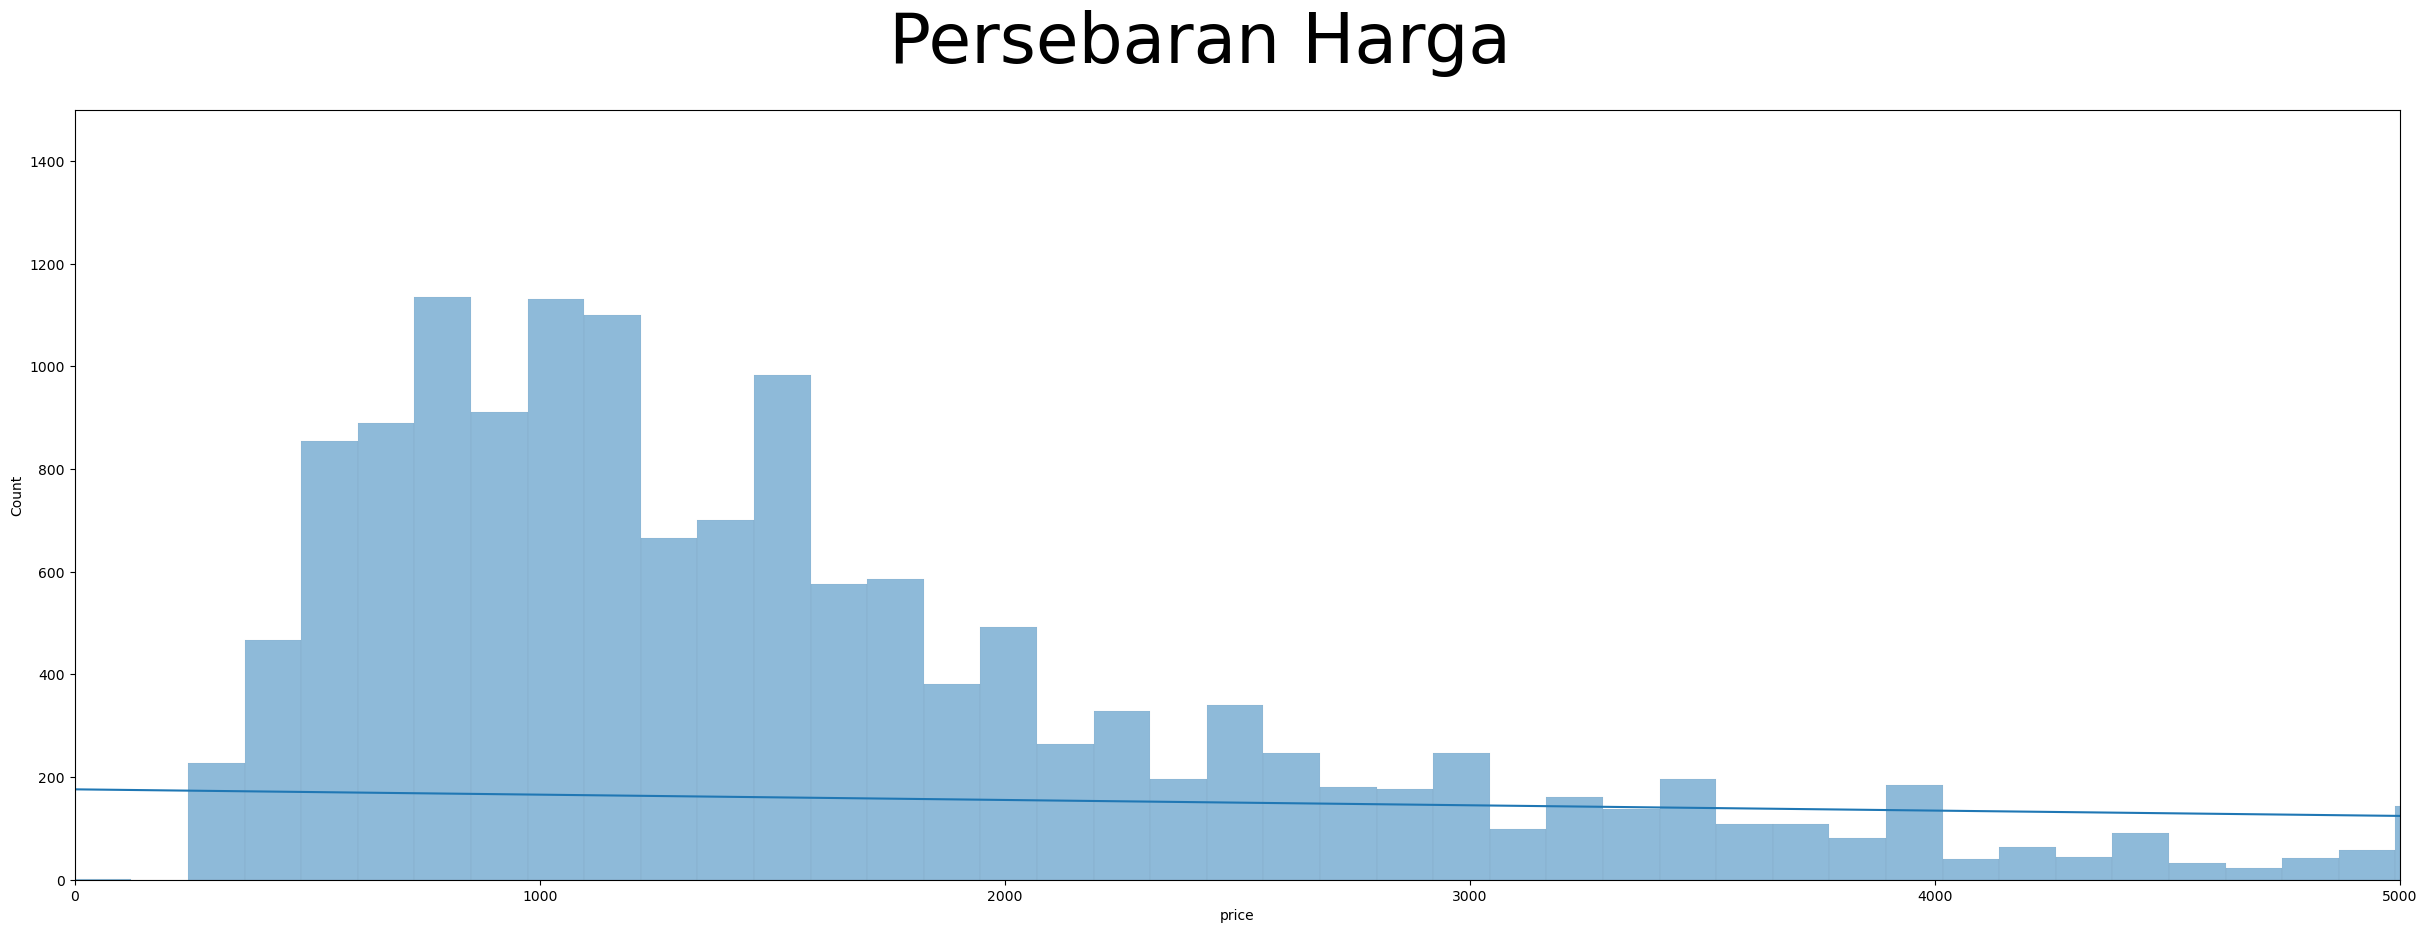

In [561]:
#Mencari persebaran data price dan tiap-tiap jarak (termasuk rata-rata ke lima tempat wisata)
plt.figure(figsize=[30,10])  
sns.histplot(df_clean["price"], kde=True)
plt.xlim(0, 5000)
plt.ylim(0, 1500) 
plt.suptitle('Persebaran Harga', size = 50)

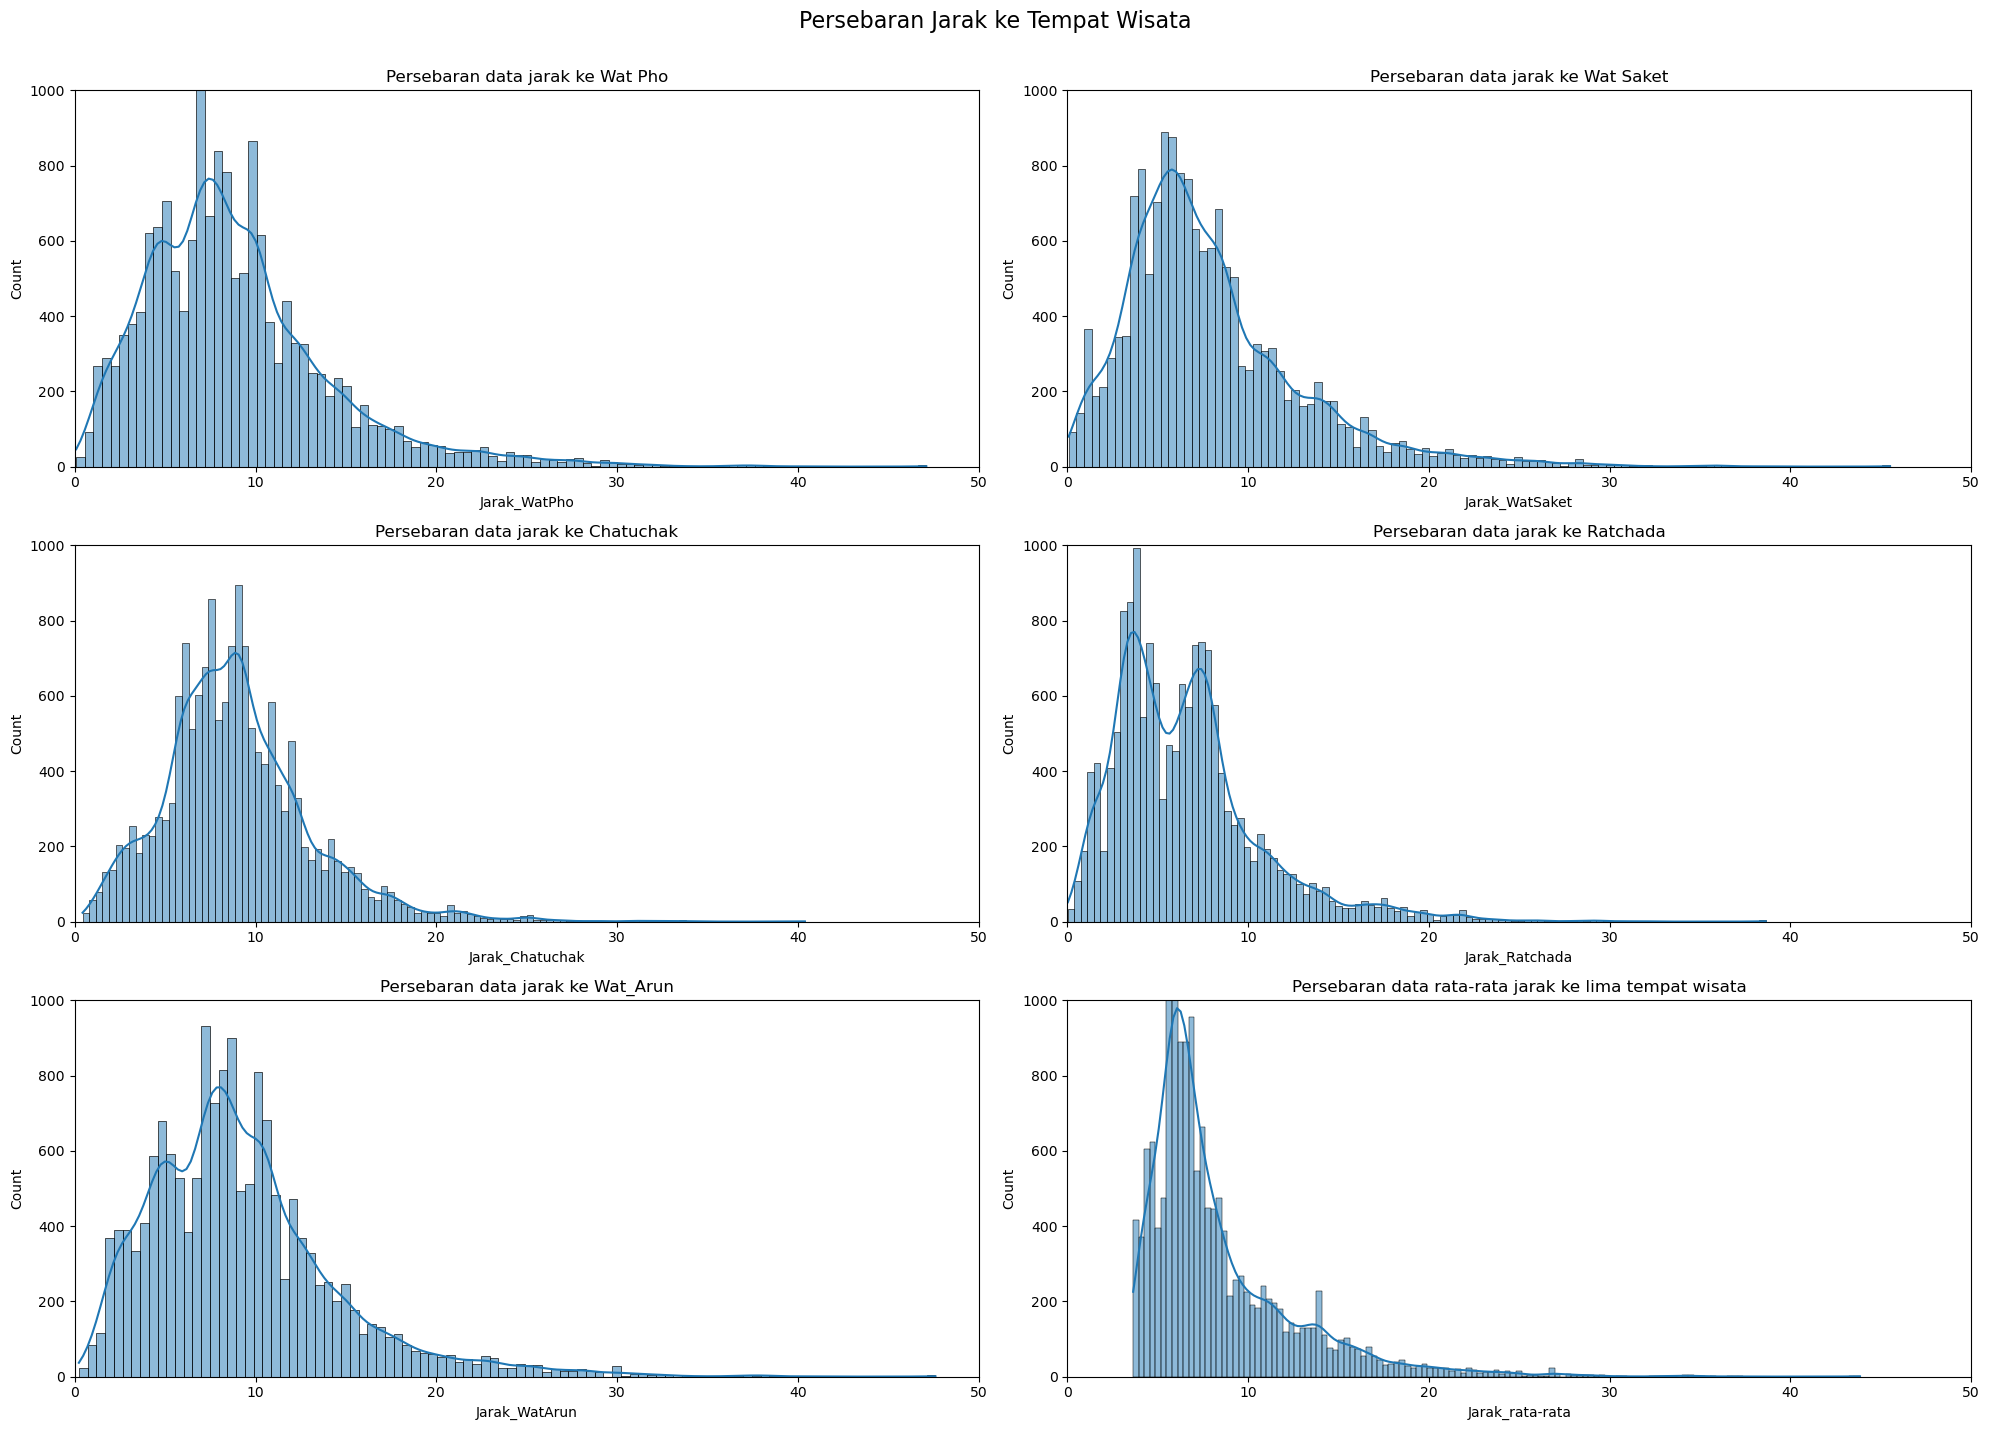

In [562]:
plt.figure(figsize=[20,15])  
plt.subplot(3, 2, 1)
sns.histplot(df_clean["Jarak_WatPho"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data jarak ke Wat Pho')

plt.subplot(3, 2, 2)
sns.histplot(df_clean["Jarak_WatSaket"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data jarak ke Wat Saket')

plt.subplot(3,2,3)
sns.histplot(df_clean["Jarak_Chatuchak"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data jarak ke Chatuchak') 

plt.subplot(3,2,4)
sns.histplot(df_clean["Jarak_Ratchada"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data jarak ke Ratchada') 

plt.subplot(3, 2, 5)
sns.histplot(df_clean["Jarak_WatArun"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data jarak ke Wat_Arun')

plt.subplot(3, 2, 6)
sns.histplot(df_clean["Jarak_rata-rata"], kde=True)
plt.xlim(0, 50)
plt.ylim(0, 1000)
plt.title('Persebaran data rata-rata jarak ke lima tempat wisata')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Menambahkan ruang dan judul keseluruhan
plt.suptitle('Persebaran Jarak ke Tempat Wisata', fontsize=16)  # Judul keseluruhan
plt.show()

Dari hasil visualisasi di atas, terlihat data yang ada di masing-masing kolom (kolom `price`, dan tiap-tiap jarak ke tempat wisata) ternyata terdistribusi tidak normal. Keseluruhan datanya terindikasi *right skewed*. Maka dari itu, untuk mencari korelasi antara price dan tiap-tiap jaraknya, harus menggunakan uji korelasi Spearman

### Uji Korelasi Harga Per Malam dan Jarak ke Wat Pho

<Axes: xlabel='price', ylabel='Jarak_WatPho'>

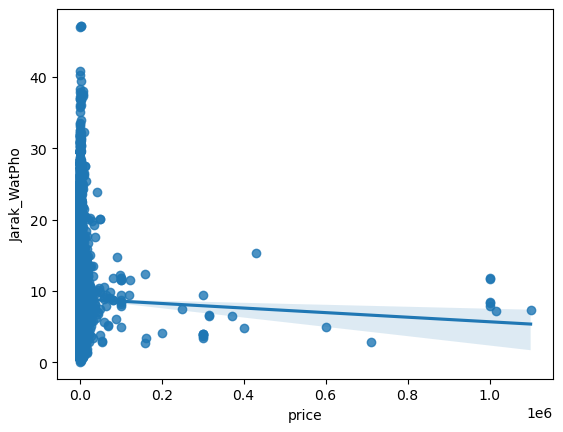

In [563]:
#Melihat Persebaran Data Harga dan Jarak Ke Wat Pho
sns.regplot(x=dfJarak_WatPho_all["price"],y=dfJarak_WatPho_all["Jarak_WatPho"])

In [564]:
#Uji korelasi Spearman untuk harga dan jarak ke Wat Pho
dfJarak_WatPho_all["price"].corr(dfJarak_WatPho_all["Jarak_WatPho"], method="spearman")

-0.14993570691718308

Terlihat dari visualisasi Regplot dan uji korelasi `spearman`, bahwa terdapat hubungan antara harga dengan jarak ke tempat wisata Wat Pho, walaupun hubungannya sangat lemah karena hanya bernilai 0,14. Hubungan ini bernilai negatif yang artinya bertolak belakang. Maksudnya adalah semakin dekat jarak penginapan ke tempat wisata, berarti harganya semakin mahal. Tapi perlu diingat ini terbilang sangat lemah.

### Uji Korelasi Harga Per Malam dan Jarak ke Wat Saket

<Axes: xlabel='price', ylabel='Jarak_WatSaket'>

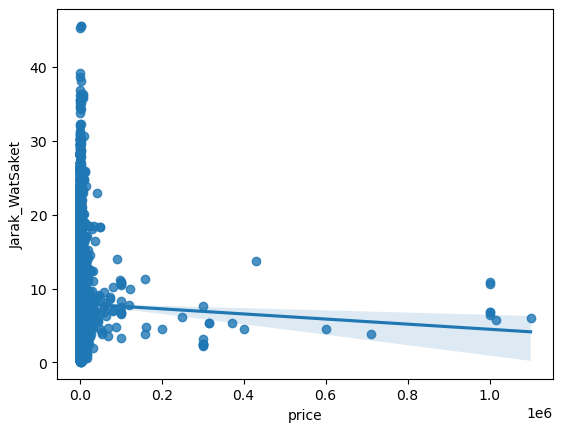

In [565]:
#Melihat Persebaran Data Harga dan Jarak Ke Wat Saket
sns.regplot(x=dfJarak_WatSaket_all["price"],y=dfJarak_WatSaket_all["Jarak_WatSaket"])

In [566]:
#Uji korelasi Spearman untuk harga dan jarak ke Wat Saket
dfJarak_WatSaket_all["price"].corr(dfJarak_WatSaket_all["Jarak_WatSaket"], method="spearman")

-0.1687066533596365

Mirip seperti hubungan dengan jarak ke Wat Pho. Hubungan harga dengan jarak ke Wat Saket juga terlihat ada namun lemah. Hubungannya hanya bernilai 0.168 dan negatif, yang berarti jarak terdekat mempunyai tendensi harga yang lebih tinggi, walaupun korelasinya lemah.

### Uji Korelasi Harga Per Malam dan Jarak ke Chatuchak

<Axes: xlabel='price', ylabel='Jarak_Chatuchak'>

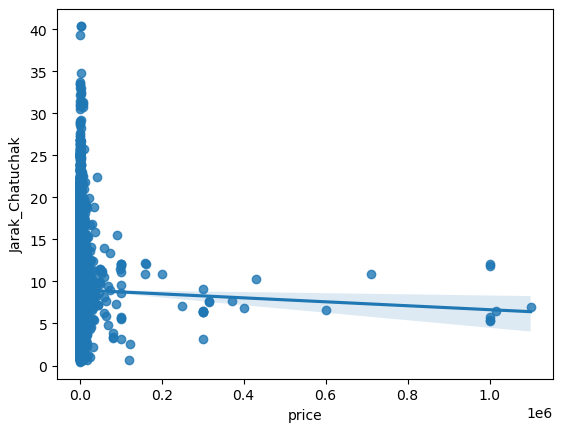

In [567]:
#Melihat Persebaran Data Harga dan Jarak Ke Chatuchak
sns.regplot(x=dfJarak_Chatuchak_all["price"],y=dfJarak_Chatuchak_all["Jarak_Chatuchak"])

In [568]:
#Uji korelasi Spearman untuk harga dan jarak ke Chatuchak
dfJarak_Chatuchak_all["price"].corr(dfJarak_Chatuchak_all["Jarak_Chatuchak"], method="spearman")

-0.10253475195457704

Korelasi antara harga dan jarak ke Chatuchak juga mempunyai nilai yang lemah, yaitu hanya sebesar 0,102 dan arahnya bertolak belakang.

### Uji Korelasi Harga Per Malam dan Jarak ke Ratchada

<Axes: xlabel='price', ylabel='Jarak_Ratchada'>

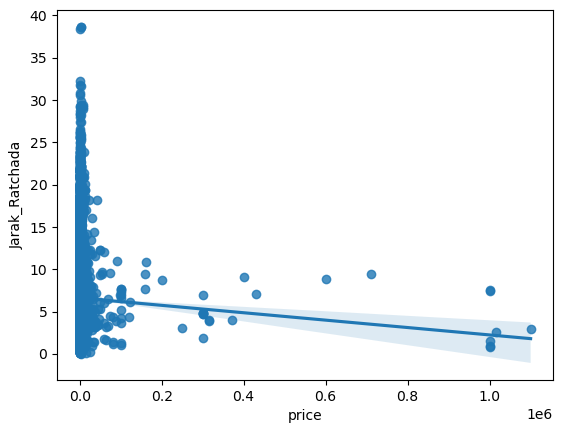

In [569]:
#Melihat Persebaran Data Harga dan Jarak Ke Ratchada
sns.regplot(x=dfJarak_Ratchada_all["price"],y=dfJarak_Ratchada_all["Jarak_Ratchada"])

In [570]:
#Uji korelasi Spearman untuk harga dan jarak ke Ratchada Night Market
dfJarak_Ratchada_all["price"].corr(dfJarak_Ratchada_all["Jarak_Ratchada"], method="spearman")

-0.23239882019800892

Terdapat perbedaan sedikit perbedaan korelasi antara harga dan jarak ke Ratchada. Terlihat nilai perbedaan menguat sedikit ke angka 0,232 dan masih bertolak belakang.

### Uji Korelasi Harga Per Malam dan Jarak ke Wat Arun

<Axes: xlabel='price', ylabel='Jarak_WatArun'>

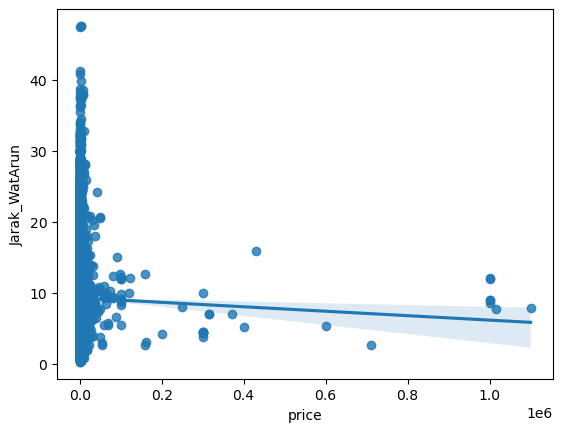

In [571]:
#Melihat Persebaran Data Harga dan Jarak Ke Wat Arun
sns.regplot(x=dfJarak_WatArun_all["price"],y=dfJarak_WatArun_all["Jarak_WatArun"])

In [572]:
#Uji korelasi Spearman untuk harga dan jarak ke Wat Arun
dfJarak_WatArun_all["price"].corr(dfJarak_WatArun_all["Jarak_WatArun"], method="spearman")

-0.1459914934178448

Masih mirip seperti hasil dengan tempat wisata yang lain, korelasi harga dan jarak ke tempat wisata Wat Arun juga mempunyai kekuatan yang lemah dengan arah bertolak belakang Kekuatannya bernilai 0.145.

### Uji Korelasi Harga Per Malam dan Jarak Rata-Rata ke Lima Tempat Wisata

<Axes: xlabel='price', ylabel='Jarak_rata-rata'>

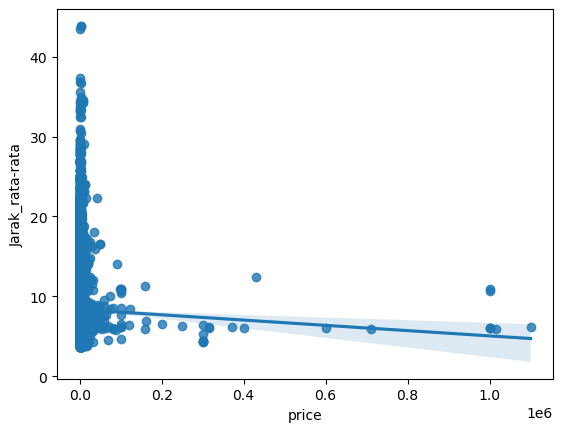

In [573]:
#Melihat Persebaran Data Harga dan Jarak Ke Lima Tempat Wisata
sns.regplot(x=dfJarak_ratarata_all["price"],y=dfJarak_ratarata_all["Jarak_rata-rata"])

In [574]:
#Uji korelasi Spearman untuk harga dan jarak ke Wat Arun
dfJarak_ratarata_all["price"].corr(dfJarak_ratarata_all["Jarak_rata-rata"], method="spearman")

-0.1698162985547166

Pada bagian hubungan harga dan jarak rata-rata hasilnya juga mirip dengan yang sebelumnya. Kekuatannya juga lemah dan bertolak belakang, nilainya adalah sekitar 0,169.

---
Setelah mendapatkan hubungan harga per malam ke masing-masing tempat wisata (dan juga ke kelima tempat wisata), dapat disimpulkan bahwa mahal atau murahnya harga penginapan hanya sedikit terpengaruh oleh jarak. Hal ini berdasar pada uji korelasi yang menunjukan hasil yang lemah.

Jadi, untuk mencari rekomendasi soal harga di masing-masing jarak, bisa menggunakan penilaian berdasarkan nilai-nilai statistika dari data-data penginapan berdasarkan jarak ke tempat wisata. Data-data ini juga dikelompokan berdasarkan tipe ruangan, sehingga penilaiannya tidak bias.

### Rekomendasi Penginapan Berdasarkan Harga, Jarak ke Tempat Wisata dan Tipe Penginapan

Pada bagian rekomendasi ini, fokus utamanya masih jarak ke tempat-tempat wisata. Namun penilaian harga ("Murah", "Standar", atau "Mahal") akan berdasar pada penilaian statistika tiap tipe-tipe penginapan dan akan diambil yang terdekat ke tempat wisata. Jarak juga menjadi penilaian, dimana jika jaraknya dekat penilaiannya akan lebih baik.

Dengan kata lain, penilaian harga akan menggunakan pendekatan statistik dan penilaian jarak akan menggunakan pendekatan *rule based*

Penilaian harga per malam juga tidak dipisahkan berdasarkan pengelompokan jarak (dekat, normal, jauh) ke tempat wisata karena nilai korelasi yang sangat lemah yaitu di sekitar 0,1 hingga 0,2. sehingga hal ini bisa diabaikan, dan langsung menghitung penilaian secara keseluruhan.

In [575]:
#Mencari acuan harga di tiap tipe penginapan
entirehome = df_clean[df_clean["room_type"]=="Entire home/apt"]
hotelroom = df_clean[df_clean["room_type"]=="Hotel room"]
privateroom = df_clean[df_clean["room_type"]=="Private room"]
shareroom= df_clean[df_clean["room_type"]=="Shared room"]

print("entire home", entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("hotelroom", hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("privateroom",privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("shareroom", shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1]))

entire home 0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64
hotelroom 0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64
privateroom 0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64
shareroom 0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64


Acuan penilaian harga (acuan statistika, per tipe ruangan), penilaian jarak (*rule based*), serta acuan total skor (*rule based*) Akan sama untuk setiap pencarian rekomendasi.

Harga `Entire home/apt` dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Murah): harganya di bawah 1028
- Nilai 3 (Murah): harganya di antara 1028 dan 1536
- Nilai 2 (Standar): harganya di antara 1536 dan 2571
- Nilai 1 (Mahal): harganya di atas 2571

Harga `Hotel room` dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Murah): harganya di bawah 995
- Nilai 3 (Murah): harganya di antara 995 dan 1700
- Nilai 2 (Standar): harganya di antara 1700 dan 3170
- Nilai 1 (Mahal): harganya di atas 3170

Harga `Private room` dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Murah): harganya di bawah 800
- Nilai 3 (Murah): harganya di antara 800 dan 1212
- Nilai 2 (Standar): harganya di antara 1212 dan 2092
- Nilai 1 (Mahal): harganya di atas 2092

Harga `Shared room` dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Murah): harganya di bawah 390
- Nilai 3 (Murah): harganya di antara 390 dan 500
- Nilai 2 (Standar): harganya di antara 500 dan 650
- Nilai 1 (Mahal): harganya di atas 650

Alasan kategorisasi pada jarak diambil berdasarkan asumsi, bahwa penginapan-penginapan ini dapat ditempuh dengan berjalan kaki ke tempat wisatanya. Hal ini didukung dari hasil visualisasi data penginapan di sekitar tempat wisata yang sudah dilakukan sebelumnya. Asumsi ini, hanya berlaku untuk data di analisa ini saja, tidak bisa menjadi acuan data lain.

Penilaian `jarak` ke setiap tempat wisata adalah (Berlaku untuk seluruh tipe rumah):
- Nilai 4 (Sangat Dekat) : Jaraknya di bawah 400 meter
- Nilai 3 (Dekat) : Jaraknya di antara  400 hingga 600 meter
- Nilai 2 (Normal) : Jaraknya di antara  600 hingga 1000 meter
- Nilai 1 (Jauh) : Jaraknya di atas 1 kilometer

pengelompokan berdasarkan total nilai (`price_score` + `jarak_score`) adalah:
- "Reccomended" : nilai total lebih dari sama dengan 7
- "Cukup Baik" : nilai total di atas atau sama dengan 5 dan dibawah 7
- "Biasa" : nilai total di bawah 5

Namun, perlu diingat juga, beberapa penginapan mengharuskan adanya pemesanan minimum untuk jumlah malamnya. Untuk itu, perlu juga diketahui detail harga yang sebenarnya dengan mengkalikan kolom `price` dengan kolom `minimum_nights` sehingga rekomendasi yang diberikan tidak akan bias dan bisa menghasilkan rekomendasi yang tepat dengan catatan jumlah minimum pemesanan.

In [576]:
#menambahkan kolom real_price, termasuk ke tiap-tiap df jarak
dfJarak_WatPho_all["Real_price"] = dfJarak_WatPho_all["minimum_nights"] * dfJarak_WatPho_all["price"]
dfJarak_WatSaket_all["Real_price"] = dfJarak_WatSaket_all["minimum_nights"] * dfJarak_WatSaket_all["price"]
dfJarak_Chatuchak_all["Real_price"] = dfJarak_Chatuchak_all["minimum_nights"] * dfJarak_Chatuchak_all["price"]
dfJarak_Ratchada_all["Real_price"] = dfJarak_Ratchada_all["minimum_nights"] * dfJarak_Ratchada_all["price"]
dfJarak_WatArun_all["Real_price"] = dfJarak_WatArun_all["minimum_nights"] * dfJarak_WatArun_all["price"]
dfJarak_ratarata_all["Real_price"] = dfJarak_ratarata_all["minimum_nights"] * dfJarak_ratarata_all["price"]

Bagian ini nantinya juga akan menjadi catatan tambahan jikalau nantinya penginapan dengan `minimum_nights` lebih dari 1 malam masuk ke dalam kategori "reccomended".

#### 1. Rekomendasi di Daerah Wat Pho

In [577]:
# Membuat df baru untuk tiap tipe ruangan.
dfWatPho_entirehome = dfJarak_WatPho_all[dfJarak_WatPho_all["room_type"]=="Entire home/apt"]
dfWatPho_hotelroom = dfJarak_WatPho_all[dfJarak_WatPho_all["room_type"]=="Hotel room"]
dfWatPho_privateroom = dfJarak_WatPho_all[dfJarak_WatPho_all["room_type"]=="Private room"]
dfWatPho_shareroom= dfJarak_WatPho_all[dfJarak_WatPho_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT di sekitar Wat Pho

In [578]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatPho_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [579]:
#Memberi penilaian terhadap harga
dfWatPho_entirehome['price_score'] = pd.qcut(dfWatPho_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [580]:
#Memberi penilaian terhadap jarak
def JarakScore(x):
    if x < 0.4:
        return 4
    elif x >= 0.4 and x < 0.6 :
        return 3
    elif x >= 0.6 and x <= 1:
        return 2
    else:
        return 1
    
dfWatPho_entirehome['jarak_score'] = dfWatPho_entirehome['Jarak_WatPho'].apply(JarakScore)

In [581]:
#memberi penilaian total dari skor jarak dan price
dfWatPho_entirehome['Total_Score'] = dfWatPho_entirehome["price_score"] + dfWatPho_entirehome["jarak_score"]

In [582]:
#Memberi penilaian untuk total score
def Penilaian_total(x):
    if x >= 7:
        return "Reccomended"
    elif x >= 5 and x < 7:
        return "Cukup Baik"
    elif x < 5 :
        return "Biasa"
    
dfWatPho_entirehome['Rekomendasi'] = dfWatPho_entirehome['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [583]:
Rekomendasi_WatPho_entirehome = dfWatPho_entirehome[(dfWatPho_entirehome['Rekomendasi'] == "Reccomended") | (dfWatPho_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatPho_entirehome_10 = Rekomendasi_WatPho_entirehome.head(10)
Rekomendasi_WatPho_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
8058,35276142,Tha tien flat,265577755,Nid,Phra Nakhon,13.74830,100.49300,Entire home/apt,2700,1,0.200103,2700,1,4,5,Cukup Baik
11881,51084340,Family room near Grand Palace,185769400,Dashell,Phra Nakhon,13.74632,100.49632,Entire home/apt,1000,1,0.383787,1000,4,4,8,Reccomended
8741,37892674,YU-HENG House / Central of Bangkok Old City.,68764708,Phurich,Phra Nakhon,13.74803,100.49797,Entire home/apt,2459,2,0.586496,4918,2,3,5,Cukup Baik
7846,34872742,Big family room near Grand Palace,185769400,Dashell,Phra Nakhon,13.74773,100.49822,Entire home/apt,971,1,0.604137,971,4,2,6,Cukup Baik
6064,29636974,52-50 Phraeng Phuthon Rd,223090140,Claudia R,Phra Nakhon,13.75060,100.49653,Entire home/apt,886,1,0.608356,886,4,2,6,Cukup Baik
2185,14324539,Na Tha Chang Home at Bangkok,9272711,Wannaporn,Phra Nakhon,13.75262,100.48993,Entire home/apt,1099,1,0.743329,1099,3,2,5,Cukup Baik
9329,39690458,★Two-Oh-Nine★ House close to The Chao Phraya R...,305053924,Priscilla,Thon buri,13.73892,100.49147,Entire home/apt,1200,1,0.850951,1200,3,2,5,Cukup Baik
6956,32180166,Canal Side with Authentic Thai food Next Door,94668537,Title,Bangkok Yai,13.74552,100.48419,Entire home/apt,1421,1,0.935003,1421,3,2,5,Cukup Baik
9227,39588492,บ้านคุณหลวงโฮมสเตย์,304187993,Chatvalee,Bangkok Yai,13.74148,100.48485,Entire home/apt,700,1,1.021730,700,4,1,5,Cukup Baik
4743,23344204,"Mimi House ,- Wang Lang market",173760794,Mimi,Bangkok Noi,13.75396,100.48508,Entire home/apt,560,2,1.171835,1120,4,1,5,Cukup Baik


Insight:
1. Pada tipe penginapan Entire home/apt di sekitar Wat Pho, rata-rata skor totalnya adalah 5,5.
2. Skor terbaik dicetak oleh penginapan "Family room near Grand Palace" milik Dashell dengan skor sempurna yaitu 8. Jarak yang sangat dekat ke tempat wisata dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan. Terutama wisatawan yang ingin mengunjungi Wat Pho.

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room di sekitar Wat Pho

In [584]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatPho_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [585]:
#Memberi penilaian terhadap harga
dfWatPho_hotelroom['price_score'] = pd.qcut(dfWatPho_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [586]:
#Memberikan nilai untuk score
dfWatPho_hotelroom['jarak_score'] = dfWatPho_hotelroom['Jarak_WatPho'].apply(JarakScore)

In [587]:
#Memberi penilaian untuk total score
dfWatPho_hotelroom['Total_Score'] = dfWatPho_hotelroom["price_score"] + dfWatPho_hotelroom["jarak_score"]
dfWatPho_hotelroom['Rekomendasi'] = dfWatPho_hotelroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [588]:
Rekomendasi_WatPho_hotel = dfWatPho_hotelroom[(dfWatPho_hotelroom['Rekomendasi'] == "Reccomended") | (dfWatPho_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatPho_hotel_10 = Rekomendasi_WatPho_hotel.head(10)
Rekomendasi_WatPho_hotel_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
2799,16472217,RALPH Bangkok,108105612,Ralph,Phra Nakhon,13.74602,100.49224,Hotel room,450,1,0.078996,450,4,4,8,Reccomended
4601,23170159,Bed+ Full Breakfast Free early check after7.00AM,14391623,Sasi,Phra Nakhon,13.74750,100.49698,Hotel room,350,1,0.467770,350,4,3,7,Reccomended
3533,19627495,Private Quad shared Bath** FULL BREAKFAST**,14391623,Sasi,Phra Nakhon,13.74812,100.49682,Hotel room,1565,1,0.472427,1565,3,3,6,Cukup Baik
6555,30897658,"Perfect for Big Group, near GRAND PALACE",14391623,Sasi,Phra Nakhon,13.74793,100.49704,Hotel room,2200,1,0.487332,2200,2,3,5,Cukup Baik
933,7247612,Deluxe Double Room in BKK Old Town,20801609,Effie,Phra Nakhon,13.74753,100.49741,Hotel room,850,2,0.513807,1700,4,3,7,Reccomended
4234,22132208,"ISSARA, BEST BED&BREAKFAST IN OLD TOWN",14391623,Sasi,Phra Nakhon,13.74763,100.49751,Hotel room,350,1,0.526865,350,4,3,7,Reccomended
7004,32501822,Bed with Best Breakfast in Old town,14391623,Sasi,Phra Nakhon,13.74922,100.49687,Hotel room,380,1,0.535031,380,4,3,7,Reccomended
5850,29012648,"Amazing bed and breakfast, Great Location!!!",14391623,Sasi,Phra Nakhon,13.74755,100.49768,Hotel room,2086,1,0.542793,2086,2,3,5,Cukup Baik
4192,21624787,"ISSARA, BEST COMFY BED & BREAKFAST IN OLD TOWN",14391623,Sasi,Phra Nakhon,13.74957,100.49764,Hotel room,350,1,0.625855,350,4,2,6,Cukup Baik
8664,37765246,Quality Sleep in Best Location Old Town BKK+SU...,14391623,Sasi,Phra Nakhon,13.74749,100.49848,Hotel room,530,1,0.626408,530,4,2,6,Cukup Baik


In [589]:
Rekomendasi_WatPho_hotel_10.describe()

,latitude,longitude,price,minimum_nights,Jarak_WatPho,Real_price,price_score,jarak_score,Total_Score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,13.747856,100.496867,911.100000,1.100000,0.487729,996.100000,3.500000,2.900000,6.400000
std,0.000986,0.001700,749.621304,0.316228,0.154016,789.076035,0.849837,0.567646,0.966092
min,13.746020,100.492240,350.000000,1.000000,0.078996,350.000000,2.000000,2.000000,5.000000
25%,13.747508,100.496898,357.500000,1.000000,0.476153,357.500000,3.250000,3.000000,6.000000
50%,13.747590,100.497225,490.000000,1.000000,0.520336,490.000000,4.000000,3.000000,6.500000
75%,13.748072,100.497608,1386.250000,1.000000,0.540852,1666.250000,4.000000,3.000000,7.000000
max,13.749570,100.498480,2200.000000,2.000000,0.626408,2200.000000,4.000000,4.000000,8.000000


Insight:
1. Pada tipe penginapan Hotel room di sekitar Wat Pho, rata-rata skor totalnya adalah 6,4, mengindikasikan adanya jumlah rekomendasi yang cukup banyak sehingga nilai tertarik di atas angka 6.
2. Skor terbaik dicetak oleh penginapan "RALPH Bangkok" milik Ralph dengan skor sempurna yaitu 8. Jarak yang sangat dekat ke tempat wisata dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan.
3. Perlu diperhatikan "Deluxe Double Room in BKK Old Town" millik Effie yang masuk pada kategori "reccomended" mengharuskan wisatawan untuk setidaknya menyewa 2 malam. Jika ini sesuai dengan kebutuhan wisatawan untuk menyewa 2 malam atau lebih, maka hal ini sangat cocok dan menjadi pertimbangan.
4. Dari 10 data yang tersedia dalam rekomendasi, Penginapan yang dimiliki oleh Sasi (Host ID 14391623) mendominasi daftar rekomendasi. Penginapan miliknya masuk sebanyak 8 tempat dan 4 penginapan diantaranya masuk pada kategori reccomended.

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room di sekitar Wat Pho

In [590]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatPho_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [591]:
#Memberi penilaian terhadap harga
dfWatPho_privateroom['price_score'] = pd.qcut(dfWatPho_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [592]:
#Memberi penilaian terhadap jarak
dfWatPho_privateroom['jarak_score'] = dfWatPho_privateroom['Jarak_WatPho'].apply(JarakScore)

In [593]:
#Memberi penilaian terhadap total skor
dfWatPho_privateroom['Total_Score'] = dfWatPho_privateroom["price_score"] + dfWatPho_privateroom["jarak_score"]
dfWatPho_privateroom['Rekomendasi'] = dfWatPho_privateroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [594]:
Rekomendasi_WatPho_privateroom = dfWatPho_privateroom[(dfWatPho_privateroom['Rekomendasi'] == "Reccomended") | (dfWatPho_privateroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatPho_privateroom_10 = Rekomendasi_WatPho_privateroom.head(10)
Rekomendasi_WatPho_privateroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
13264,660480154818347286,"Thewet Hideaway, the White bedroom.",234732854,Taraa Adrianne,Phra Nakhon,13.746840,100.495870,Private room,3000,1,0.336626,3000,1,4,5,Cukup Baik
7210,33047916,246 House Family BR Walk to Grand Palace & Wat...,248201804,Patanee,Phra Nakhon,13.746880,100.496180,Private room,1857,1,0.370437,1857,2,4,6,Cukup Baik
7188,33024940,246 House KingBR Walk to Grand Palace & Wat Pho,248201804,Patanee,Phra Nakhon,13.748530,100.496240,Private room,914,1,0.436498,914,3,3,6,Cukup Baik
11461,47085294,Sabai Sabai Houseboat BKK Priv. Bathr.Cabin,354561299,Roger,Phra Nakhon,13.750550,100.493060,Private room,1800,1,0.448619,1800,2,3,5,Cukup Baik
2812,17007746,Comfort chic & budget on 4 fl -walk to RoyalPa...,4381385,Phil,Phra Nakhon,13.748200,100.496830,Private room,867,1,0.476840,867,3,3,6,Cukup Baik
15425,779291750290822236,Comfy room -walk to Royal Palace,4381385,Phil,Phra Nakhon,13.747853,100.496973,Private room,981,1,0.477763,981,3,3,6,Cukup Baik
934,7247963,Standard Family's Boutique Room near Grand Palace,20801609,Effie,Phra Nakhon,13.747450,100.497420,Private room,1350,1,0.512985,1350,2,3,5,Cukup Baik
1256,7836335,Deluxe Family's Boutique Room near Wat Pho,20801609,Effie,Phra Nakhon,13.747530,100.497410,Private room,1350,1,0.513807,1350,2,3,5,Cukup Baik
1088,8583753,Double Deck Room near Grand Palace,20801609,Effie,Phra Nakhon,13.747480,100.497440,Private room,814,1,0.515787,814,3,3,6,Cukup Baik
1026,7172790,Boutique 4 Beds Room near Wat Pho,20801609,Effie,Phra Nakhon,13.747340,100.497480,Private room,1600,1,0.517026,1600,2,3,5,Cukup Baik


insight:
1. Dari 10 data yang ditampilkan (diambil dari 10 data yang terdekat ke Wat Pho), Tipe ruangan Private room tidak ada yang bernilai Recommended. Hal ini bisa dikarenakan tidak ada harga yang bisa dikelompokan menjadi sangat murah.

##### Shared room
mencari rekomendasi harga dengan ruangan bertipe Shared Room di sekitar Wat Pho

In [595]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatPho_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [596]:
#Memberi penilaian terhadap harga
dfWatPho_shareroom['price_score'] = pd.qcut(dfWatPho_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [597]:
#Memberi penilaian terhadap Jarak
dfWatPho_shareroom['jarak_score'] = dfWatPho_shareroom['Jarak_WatPho'].apply(JarakScore)

In [598]:
#Memberi penilaian terhadap total skor
dfWatPho_shareroom['Total_Score'] = dfWatPho_shareroom["price_score"] + dfWatPho_shareroom["jarak_score"]
dfWatPho_shareroom['Rekomendasi'] = dfWatPho_shareroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [599]:
Rekomendasi_WatPho_shareroom = dfWatPho_shareroom[(dfWatPho_shareroom['Rekomendasi'] == "Reccomended") | (dfWatPho_shareroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatPho_shareroom_10 = Rekomendasi_WatPho_shareroom.head(10)
Rekomendasi_WatPho_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatPho,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
4460,22710227,Best Quality BED& BREAKFAST in old town,14391623,Sasi,Phra Nakhon,13.747540,100.496790,Shared room,350,1,0.448934,350,4,3,7,Reccomended
10585,42726758,The Onion Hostel 8-bed bunk Women's Dormitory,122574334,The Onion,Phra Nakhon,13.742170,100.496320,Shared room,495,1,0.613892,495,3,2,5,Cukup Baik
5250,26260328,The Onion Hostel at Flower Market (mixed dorm),122574334,The Onion,Phra Nakhon,13.741970,100.496690,Shared room,495,1,0.656392,495,3,2,5,Cukup Baik
7819,34343886,"Volunteer English Bangkok @Wat Arun,Temple of ...",159901269,Winyoo,Thon buri,13.739510,100.490800,Shared room,320,7,0.802842,2240,4,2,6,Cukup Baik
9699,40473104,Mystery Hostel,313221586,Krit,Phra Nakhon,13.757300,100.497330,Shared room,304,1,1.291913,304,4,1,5,Cukup Baik
9636,40651692,Mystery Hostel l: Deluxe 10 Bred Mix Dormitory,313221586,Krit,Phra Nakhon,13.757530,100.497090,Shared room,303,1,1.305979,303,4,1,5,Cukup Baik
5255,26691694,12 Bed Mixed Dorm near Khaosan Road,154517750,Waewwan,Phra Nakhon,13.758830,100.496020,Shared room,364,1,1.408041,364,4,1,5,Cukup Baik
14471,737267689479873270,GIRLS only hostel (4 Beds) in Khao San Rd b,483119696,The Locals,Phra Nakhon,13.759949,100.492818,Shared room,388,1,1.487487,388,4,1,5,Cukup Baik
9557,40596774,Lady Room 4 Bed with Shared Bathroom,313221586,Krit,Phra Nakhon,13.758730,100.498820,Shared room,320,1,1.502223,320,4,1,5,Cukup Baik
14930,751779430934701917,Bed in dormitory 1-min to Khaosan Road but quiet,154517750,Waewwan,Phra Nakhon,13.759590,100.497320,Shared room,390,1,1.528847,390,4,1,5,Cukup Baik


Insight:
1. Dari 10 data yang ada, hanya ada 1 rekomendasi yang termasuk ke dalam penilaian "Reccomended" dengan total skor 7. Sisanya, hanya memiliki penilaian 5 sampai 6.
2. Best Quality BED& BREAKFAST in old town milik Sasi, adalah yang bernilai 7, jaraknya sekitar 400 meter dengan harga hanya 350 saja.

#### 2. Rekomendasi di Daerah Wat Saket

In [600]:
# Membuat df baru untuk tiap tipe ruangan di sekitar Wat Saket.
dfWatSaket_entirehome = dfJarak_WatSaket_all[dfJarak_WatSaket_all["room_type"]=="Entire home/apt"]
dfWatSaket_hotelroom = dfJarak_WatSaket_all[dfJarak_WatSaket_all["room_type"]=="Hotel room"]
dfWatSaket_privateroom = dfJarak_WatSaket_all[dfJarak_WatSaket_all["room_type"]=="Private room"]
dfWatSaket_shareroom= dfJarak_WatSaket_all[dfJarak_WatSaket_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT di sekitar Wat Saket

In [601]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatSaket_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [602]:
#Memberi penilaian terhadap harga
dfWatSaket_entirehome['price_score'] = pd.qcut(dfWatSaket_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [603]:
#Memberi penilaian terhadap jarak
dfWatSaket_entirehome['jarak_score'] = dfWatSaket_entirehome['Jarak_WatSaket'].apply(JarakScore)

In [604]:
#memberi penilaian total dari skor jarak dan price
dfWatSaket_entirehome['Total_Score'] = dfWatSaket_entirehome["price_score"] + dfWatSaket_entirehome["jarak_score"]

In [605]:
#Memberi penilaian untuk total score
dfWatSaket_entirehome['Rekomendasi'] = dfWatSaket_entirehome['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [606]:
Rekomendasi_WatSaket_entirehome = dfWatSaket_entirehome[(dfWatSaket_entirehome['Rekomendasi'] == "Reccomended") | (dfWatSaket_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatSaket_entirehome_10 = Rekomendasi_WatSaket_entirehome.head(10)
Rekomendasi_WatSaket_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatSaket,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
9306,39480335,Modern room near Khaosan/Grand Palace up to 4Per.,59874191,Angela,Pom Prap Sattru Phai,13.75666,100.50751,Entire home/apt,920,1,0.301607,920,4,4,8,Reccomended
636,5462996,Cozy Room near the United Nation,28329151,P.K. Garden Home,Pom Prap Sattru Phai,13.75686,100.50885,Entire home/apt,2200,1,0.395162,2200,2,4,6,Cukup Baik
4124,21902645,Extra large room near Khaosan up to 6 people #4,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,949,1,0.438671,949,4,3,7,Reccomended
5286,26304795,Big APT near Khaosan/Grand Palace (up to 4per....,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,1056,1,0.438671,1056,3,3,6,Cukup Baik
1666,11722665,Big Apt near Khoasan/Grand Palace Up to 6 per....,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,899,1,0.438671,899,4,3,7,Reccomended
4121,21892849,Extra large room near Khaosan up to 6 people #3,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,949,1,0.438671,949,4,3,7,Reccomended
4123,21902299,Extra large room near Khaosan up to 6 people #2,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,858,1,0.438671,858,4,3,7,Reccomended
695,5594628,Beautiful Room within Heritage zone,28329151,P.K. Garden Home,Pom Prap Sattru Phai,13.75804,100.50740,Entire home/apt,2200,4,0.444833,8800,2,3,5,Cukup Baik
4150,21942846,Big Apt near Khaosan/Grand palace Up to 6 Per....,59874191,Angela,Pom Prap Sattru Phai,13.75817,100.50813,Entire home/apt,899,1,0.481607,899,4,3,7,Reccomended
696,5594846,Cozy room in heritage zone of BKK,28329151,P.K. Garden Home,Pom Prap Sattru Phai,13.75797,100.50862,Entire home/apt,2200,1,0.483641,2200,2,3,5,Cukup Baik


Insight:
1. Pada tipe penginapan Entire home/apt di sekitar Wat Saket, terlihat ada 6 penginapan yang masuk ke kategori reccomended dari 10 data yang terpilih.
2. Skor terbaik dicetak oleh penginapan "Modern room near Khaosan/Grand Palace up to 4Per" milik Angela dengan skor sempurna yaitu 8. Jarak yang sangat dekat ke tempat wisata (sekitar 300 meter) dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan yang ingin berkunjung

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room di sekitar Wat Saket

In [607]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatSaket_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [608]:
#Memberi penilaian terhadap harga
dfWatSaket_hotelroom['price_score'] = pd.qcut(dfWatSaket_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [609]:
#Memberikan nilai untuk score
dfWatSaket_hotelroom['jarak_score'] = dfWatSaket_hotelroom['Jarak_WatSaket'].apply(JarakScore)

In [610]:
#Memberi penilaian untuk total score
dfWatSaket_hotelroom['Total_Score'] = dfWatSaket_hotelroom["price_score"] + dfWatSaket_hotelroom["jarak_score"]
dfWatSaket_hotelroom['Rekomendasi'] = dfWatSaket_hotelroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [611]:
Rekomendasi_WatSaket_hotel = dfWatSaket_hotelroom[(dfWatSaket_hotelroom['Rekomendasi'] == "Reccomended") | (dfWatSaket_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatSaket_hotel_10 = Rekomendasi_WatSaket_hotel.head(10)
Rekomendasi_WatSaket_hotel_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatSaket,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
2748,16397601,8Beds Mixed Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75440,100.50423,Hotel room,318,1,0.249000,318,4,4,8,Reccomended
6333,30594430,"Superior Golden mount view suite, old town Ban...",32101291,Punyada,Phra Nakhon,13.75252,100.50473,Hotel room,1065,1,0.261353,1065,3,4,7,Reccomended
5851,29024718,Family two bedroom for 4 with private bathroom,32101291,Punyada,Phra Nakhon,13.75244,100.50467,Hotel room,1301,1,0.272123,1301,3,4,7,Reccomended
8625,37572264,Vintage LOFT SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,5400,1,0.375890,5400,1,4,5,Cukup Baik
8624,37571391,Vintage GARDEN SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,5400,1,0.375890,5400,1,4,5,Cukup Baik
8623,37570838,Vintage HONEYMOON SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,6600,1,0.375890,6600,1,4,5,Cukup Baik
8628,37573711,Vintage TWIN ROOM in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,4000,1,0.375890,4000,1,4,5,Cukup Baik
8626,37572967,Vintage LOFT SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,4800,1,0.375890,4800,1,4,5,Cukup Baik
3386,18483173,8 beds in Female dorm,121963674,Hanu,Phra Nakhon,13.75517,100.50279,Hotel room,450,1,0.419322,450,4,3,7,Reccomended
2770,16443912,4Beds Female Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75451,100.50229,Hotel room,318,1,0.458883,318,4,3,7,Reccomended


Insight:
1. Terdapat lima penginapan yang bernilai reccomended di sekitar Wat Saket.
2. Terdapat 2 penginapan milik Baan 89 yaitu "8Beds Mixed Dormitory@Baan 89 Hostel" dan "4Beds Female Dormitory@Baan 89 Hostel" yang masuk ke daftar sepuluh terbaik ini. 2 penginapan ini juga menjadi penginapan termurah dari penginapan sekitarnya, dengan harga 318.

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room di sekitar Wat Pho

In [612]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatSaket_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [613]:
#Memberi penilaian terhadap harga
dfWatSaket_privateroom['price_score'] = pd.qcut(dfWatSaket_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [614]:
#Memberi penilaian terhadap jarak
dfWatSaket_privateroom['jarak_score'] = dfWatSaket_privateroom['Jarak_WatSaket'].apply(JarakScore)

In [615]:
#Memberi penilaian terhadap total skor
dfWatSaket_privateroom['Total_Score'] = dfWatSaket_privateroom["price_score"] + dfWatSaket_privateroom["jarak_score"]
dfWatSaket_privateroom['Rekomendasi'] = dfWatSaket_privateroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [616]:
Rekomendasi_WatSaket_privateroom = dfWatSaket_privateroom[(dfWatSaket_privateroom['Rekomendasi'] == "Reccomended") | (dfWatSaket_privateroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatSaket_privateroom_10 = Rekomendasi_WatSaket_privateroom.head(10)
Rekomendasi_WatSaket_privateroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatSaket,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
4241,22217367,Family 8 beds room (2nd),30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75330,100.50617,Private room,3200,1,0.097407,3200,1,4,5,Cukup Baik
1517,9534453,Family 4 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75312,100.50638,Private room,2900,1,0.110897,2900,1,4,5,Cukup Baik
805,6506565,Family 8 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75305,100.50612,Private room,3200,1,0.125160,3200,1,4,5,Cukup Baik
8719,37849267,Family Room for 3 at khaosan road hotel+ Break...,8444643,Kiattisak,Phra Nakhon,13.75479,100.50519,Private room,1999,1,0.161526,1999,2,4,6,Cukup Baik
5582,27499440,"Tawan Vacation Home, Fifth Floor Luxury Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75592,100.50648,Private room,2424,1,0.199866,2424,1,4,5,Cukup Baik
5516,27452817,"Tawan Vacation Home, 4th Floor Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75597,100.50614,Private room,2424,1,0.209304,2424,1,4,5,Cukup Baik
5606,28263736,อพาร์ทเมนต์หนึ่งห้องนอนที่เงียบสงบและกว้างขวาง,213471505,Jim,Pom Prap Sattru Phai,13.75617,100.50606,Private room,2597,1,0.232724,2597,1,4,5,Cukup Baik
5518,27452975,"Tawan Vacation Home, Third Floor Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75574,100.50792,Private room,2424,1,0.235587,2424,1,4,5,Cukup Baik
13888,703362702092012660,"4 people, Grand View on 5th fl free massage",321029505,Bas,Phra Nakhon,13.75386,100.50433,Private room,2312,1,0.237827,2312,1,4,5,Cukup Baik
4649,23827762,A private dorm in an amazing 8 beds dormitory,50427057,Once Again,Phra Nakhon,13.75372,100.50434,Private room,3400,1,0.239085,3400,1,4,5,Cukup Baik


insight:
1. Sama seperti penginapan bertipe private room di sekitar Wat Pho, penginapan private room di sekitar Wat Saket juga tidak ada yang memenuhi standar rekomendasi berlabel reccomended. Permasalahannya juga masih sama yaitu harga-harga penginapan disini tergolong mahal. hanya ada 1 tempat, yaitu "Family Room for 3 at khaosan road hotel+ Break" milik Kiattisak yang harganya masuk pada kategori standar. Sisanya dianggap lebih mahal.

##### Shared room
mencari rekomendasi harga dengan ruangan bertipe Shared Room di sekitar Wat Pho

In [617]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatSaket_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [618]:
#Memberi penilaian terhadap harga
dfWatSaket_shareroom['price_score'] = pd.qcut(dfWatSaket_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [619]:
#Memberi penilaian terhadap Jarak
dfWatSaket_shareroom['jarak_score'] = dfWatSaket_shareroom['Jarak_WatSaket'].apply(JarakScore)

In [620]:
#Memberi penilaian terhadap total skor
dfWatSaket_shareroom['Total_Score'] = dfWatSaket_shareroom["price_score"] + dfWatSaket_shareroom["jarak_score"]
dfWatSaket_shareroom['Rekomendasi'] = dfWatSaket_shareroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [621]:
Rekomendasi_WatSaket_shareroom = dfWatSaket_shareroom[(dfWatSaket_shareroom['Rekomendasi'] == "Reccomended") | (dfWatSaket_shareroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatSaket_shareroom_10 = Rekomendasi_WatSaket_shareroom.head(10)
Rekomendasi_WatSaket_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatSaket,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
867,5908165,Bunk bed in Female Dormitory,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75341,100.50651,Shared room,550,1,0.077867,550,2,4,6,Cukup Baik
1317,9617839,Bunk Bed in Mixed Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75384,100.50510,Shared room,1000,1,0.155862,1000,1,4,5,Cukup Baik
1318,9618414,Bunk Bed in Female Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75365,100.50483,Shared room,1000,1,0.189182,1000,1,4,5,Cukup Baik
641,5106193,Here Hostel Bangkok/ Lady Dormitory Room,23521099,Here Hostel,Phra Nakhon,13.75506,100.50443,Shared room,797,1,0.248477,797,1,4,5,Cukup Baik
1561,9944717,Amazing Bed in 8-Bed Superior Dorm,50427057,Once Again,Phra Nakhon,13.75329,100.50435,Shared room,650,1,0.251124,650,2,4,6,Cukup Baik
858,5907524,Bunk bed in Mixed Dormitory,30682777,Golden Mountain Hostel,Phra Nakhon,13.75306,100.50424,Shared room,400,1,0.272137,400,3,4,7,Reccomended
4266,22234154,Ratana hostel 1 room\nfor 4-6 person share bat...,37534445,Chowey,Pom Prap Sattru Phai,13.75673,100.50712,Shared room,1300,1,0.296783,1300,1,4,5,Cukup Baik
2014,13437504,aBED in dorm w BF nr. Gd Palace,19669460,Boul,Pom Prap Sattru Phai,13.75159,100.50554,Shared room,400,1,0.298422,400,3,4,7,Reccomended
1437,9782116,Amazing Bed in a 8-Bed Dorm!,50427057,Once Again,Phra Nakhon,13.75223,100.50439,Shared room,450,1,0.310143,450,3,4,7,Reccomended
3373,18559076,Mixed dorm near Khao San Road,121963674,Hanu,Phra Nakhon,13.75620,100.50449,Shared room,450,1,0.318077,450,3,4,7,Reccomended


Insight:
1. Dari 10 data yang tersedia di sekitar Wat Saket, ada 4 rekomendasi yang termasuk ke dalam penilaian "Reccomended" dengan total skor masing-masing 7. Sisanya, hanya memiliki penilaian 5 sampai 6.
2. "Bunk bed in Female Dormitory" milik Golden Mountain Hostel memiliki jarak terdekat dari tempat wisata Wat Saket, yaitu hanya sekitar 70 meter saja. Namun, ternyata harganya masuk ke tipe golongan standar, menjadikan skor total hanya bernilai 6 dan masuk ke kategori "cukup baik"

#### 3. Rekomendasi di Daerah Chatuchak

In [622]:
# Membuat df baru untuk tiap tipe ruangan di sekitar Chatuchak.
dfChatuchak_entirehome = dfJarak_Chatuchak_all[dfJarak_Chatuchak_all["room_type"]=="Entire home/apt"]
dfChatuchak_hotelroom = dfJarak_Chatuchak_all[dfJarak_Chatuchak_all["room_type"]=="Hotel room"]
dfChatuchak_privateroom = dfJarak_Chatuchak_all[dfJarak_Chatuchak_all["room_type"]=="Private room"]
dfChatuchak_shareroom= dfJarak_Chatuchak_all[dfJarak_Chatuchak_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT di sekitar Chatuchak

In [623]:
#Mencari quantile untuk menjadi acuan penilaian
dfChatuchak_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [624]:
#Memberi penilaian terhadap harga
dfChatuchak_entirehome['price_score'] = pd.qcut(dfChatuchak_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [625]:
#Memberi penilaian terhadap jarak
dfChatuchak_entirehome['jarak_score'] = dfChatuchak_entirehome['Jarak_Chatuchak'].apply(JarakScore)

In [626]:
#memberi penilaian total dari skor jarak dan price
dfChatuchak_entirehome['Total_Score'] = dfChatuchak_entirehome["price_score"] + dfChatuchak_entirehome["jarak_score"]

In [627]:
#Memberi penilaian untuk total score
dfChatuchak_entirehome['Rekomendasi'] = dfChatuchak_entirehome['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [628]:
Rekomendasi_Chatuchak_entirehome = dfChatuchak_entirehome[(dfChatuchak_entirehome['Rekomendasi'] == "Reccomended") | (dfChatuchak_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Chatuchak_entirehome_10 = Rekomendasi_Chatuchak_entirehome.head(10)
Rekomendasi_Chatuchak_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Chatuchak,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
8888,38759420,Line MRT BTS 1min One bedroom,287988340,Best Center,Chatu Chak,13.80217,100.55313,Entire home/apt,1000,365,0.430574,365000,4,3,7,Reccomended
8739,37888349,"1BR Citycentral Apt, chatuchak weekend market",20272648,Grischtana,Chatu Chak,13.79985,100.54954,Entire home/apt,2078,1,0.517071,2078,2,3,5,Cukup Baik
5167,25421225,★BTS Mochit★MRT/VVIPGarden/JJ Market/5Star/Pool,121366207,Lily,Chatu Chak,13.80590,100.55543,Entire home/apt,1479,20,0.612711,29580,3,2,5,Cukup Baik
7449,33467112,"Stylish&Comfy Room,190m JJ mkt,near 7-11,BTS &...",14751074,Kannika,Chatu Chak,13.79880,100.55135,Entire home/apt,1129,20,0.649383,22580,3,2,5,Cukup Baik
4610,23213539,"Excellent location, cosy and luxurious apartment",171717553,Thomas,Chatu Chak,13.80513,100.55613,Entire home/apt,900,90,0.672238,81000,4,2,6,Cukup Baik
4337,22590252,Nordic Home by the Park + Free Transfer,108793,Eddie,Chatu Chak,13.80620,100.55621,Entire home/apt,950,30,0.702770,28500,4,2,6,Cukup Baik
6969,32298542,Superbe Condo avec WiFi,215316568,Kessanee,Chatu Chak,13.80680,100.55637,Entire home/apt,627,25,0.739526,15675,4,2,6,Cukup Baik
4822,24169914,Life@Phaholyothin18 opposite JJ market 5 min walk,156866159,Nunthawan,Chatu Chak,13.79800,100.55177,Entire home/apt,900,30,0.746428,27000,4,2,6,Cukup Baik
6600,31393141,The Best Bangkok Choice near all City Transit,235135286,May,Chatu Chak,13.80588,100.55697,Entire home/apt,850,60,0.774563,51000,4,2,6,Cukup Baik
7279,33294328,"WFH @ Modern Room near Jatujak, OrTorKor, BTS,...",77025207,Chutima,Chatu Chak,13.79733,100.55072,Entire home/apt,850,28,0.798418,23800,4,2,6,Cukup Baik


Insight:
1. Pada tipe penginapan Entire home/apt di sekitar Chatuchak, hanya terdapat 1 penginapan "reccomended" yaitu "Line MRT BTS 1min One bedroom" milik Best Center. Harganya tergolong sangat murah, meskipun jaraknya tidak tergolong "Sangat Dekat" tapi masih cukup dekat karena berjarak sekitar 400 meter ke tempat wisata Chatuchak. Akan tetapi, perlu diingat bahwa penginapan ini hanya cocok untuk penyewa yang ingin tinggal selama 1 tahun di Bangkok. Hal ini dikarenakan minimum nights dari penginapan ini mengharuskan untuk menyewa 365 hari.
2. Sangat jarang ada wisatawan yang ingin tinggal setahun penuh di sebuah kota di Bangkok. Sehingga bisa dianggap bagian rekomendasi ini tidak terlalu tepat untuk wisaatawan.

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room di sekitar Chatuchak

In [629]:
#Mencari quantile untuk menjadi acuan penilaian
dfChatuchak_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [630]:
#Memberi penilaian terhadap harga
dfChatuchak_hotelroom['price_score'] = pd.qcut(dfChatuchak_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [631]:
#Memberikan nilai untuk score
dfChatuchak_hotelroom['jarak_score'] = dfChatuchak_hotelroom['Jarak_Chatuchak'].apply(JarakScore)

In [632]:
#Memberi penilaian untuk total score
dfChatuchak_hotelroom['Total_Score'] = dfChatuchak_hotelroom["price_score"] + dfChatuchak_hotelroom["jarak_score"]
dfChatuchak_hotelroom['Rekomendasi'] = dfChatuchak_hotelroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [633]:
Rekomendasi_Chatuchak_hotel = dfChatuchak_hotelroom[(dfChatuchak_hotelroom['Rekomendasi'] == "Reccomended") | (dfChatuchak_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Chatuchak_hotel_10 = Rekomendasi_Chatuchak_hotel.head(10)
Rekomendasi_Chatuchak_hotel_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Chatuchak,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
7693,34492679,Bed in female dorm. 1 minute walk to BTS station.,30352838,Tossaporn,Phaya Thai,13.79576,100.55010,Hotel room,447,1,0.967860,447,4,2,6,Cukup Baik
3613,19755230,Bed in female dorm. 1 minute walk to BTS station.,30352838,Tossaporn,Phaya Thai,13.79475,100.54934,Hotel room,450,1,1.081443,450,4,1,5,Cukup Baik
3580,19691074,A bed in mix dorm. 1 minute walk from BTS stat...,30352838,Tossaporn,Phaya Thai,13.79366,100.55013,Hotel room,450,1,1.200220,450,4,1,5,Cukup Baik
1766,11563263,Cozy room#7 (Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.79030,100.54963,Hotel room,850,1,1.572166,850,4,1,5,Cukup Baik
1438,9786949,Cozy room#2 (Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.79033,100.54818,Hotel room,850,1,1.580052,850,4,1,5,Cukup Baik
1621,11362562,Cozy room#6 (Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.79014,100.55027,Hotel room,850,1,1.589885,850,4,1,5,Cukup Baik
1815,11236627,Comfy accom. 6 (BTS Saphan khwai),26736483,K,Phaya Thai,13.78989,100.55014,Hotel room,850,1,1.617294,850,4,1,5,Cukup Baik
1605,11334536,Cozy room #4(Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.78985,100.54995,Hotel room,850,1,1.621583,850,4,1,5,Cukup Baik
1816,11237155,Comfy accom. 7 (BTS Saphan khwai),26736483,K,Phaya Thai,13.78984,100.55002,Hotel room,850,1,1.622709,850,4,1,5,Cukup Baik
1585,11287949,Cozy room#5 (Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.78939,100.54802,Hotel room,850,1,1.685386,850,4,1,5,Cukup Baik


Insight:
1. Dari 10 penginapan bertipe Hotel Room ternyata tidak ada yang tergolong sangat dekat, ataupun dekat. sehingga dapat diambil kesimpulan, di daerah sekitar Chatuchak tidak tersedia hotel room.
2. Menariknya, seluruh harga yang ditampilkan pada bagian hotel room ini, terbilang sangat Murah, akan tetapi karena jaraknya terlalu jauh dari tempat wisata Chatuchak, maka tidak ada yang masuk dalam kategori "Reccomended".

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room di sekitar Wat Pho

In [634]:
#Mencari quantile untuk menjadi acuan penilaian
dfChatuchak_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [635]:
#Memberi penilaian terhadap harga
dfChatuchak_privateroom['price_score'] = pd.qcut(dfChatuchak_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [636]:
#Memberi penilaian terhadap jarak
dfChatuchak_privateroom['jarak_score'] = dfChatuchak_privateroom['Jarak_Chatuchak'].apply(JarakScore)

In [637]:
#Memberi penilaian terhadap total skor
dfChatuchak_privateroom['Total_Score'] = dfChatuchak_privateroom["price_score"] + dfChatuchak_privateroom["jarak_score"]
dfChatuchak_privateroom['Rekomendasi'] = dfChatuchak_privateroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [638]:
Rekomendasi_Chatuchak_privateroom = dfChatuchak_privateroom[(dfChatuchak_privateroom['Rekomendasi'] == "Reccomended") | (dfChatuchak_privateroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Chatuchak_privateroom_10 = Rekomendasi_Chatuchak_privateroom.head(10)
Rekomendasi_Chatuchak_privateroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Chatuchak,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
8861,38058605,"Excellent location, best facilities ,worth to pay",13625199,Jidapa,Chatu Chak,13.805450,100.554900,Private room,1200,30,0.545769,36000,3,3,6,Cukup Baik
11516,48234072,Entire Condominium - MRT Mochit/BTS Jatujak/JJ,65935616,Platong,Chatu Chak,13.797790,100.551840,Private room,1103,5,0.770837,5515,3,2,5,Cukup Baik
14649,745206650067863142,The Line Jatujak - Mochit,457231205,Nijjaree,Chatu Chak,13.806905,100.557392,Private room,1000,7,0.847684,7000,3,2,5,Cukup Baik
7307,33131297,Chatuchak Interchange station(BTS&MRT),160555352,Smith,Chatu Chak,13.798950,100.555400,Private room,690,5,0.851929,3450,4,2,6,Cukup Baik
8980,38422872,D Light private room@JJ market&BTS SaphanKwai+...,292825456,Surang,Chatu Chak,13.796650,100.550610,Private room,615,2,0.872212,1230,4,2,6,Cukup Baik
15562,781926820366186766,ที่พักใกล้ BTS หมอชิต / MRT จตุจักร ตลาดจตุจักร,51673686,Prae,Chatu Chak,13.796850,100.553100,Private room,760,2,0.913208,1520,4,2,6,Cukup Baik
4305,22807659,Summer Buffalo Loft @JJ Market&BTS SaphanKwai+...,168549905,Nisit,Phaya Thai,13.795110,100.548700,Private room,615,2,1.048317,1230,4,1,5,Cukup Baik
15610,780856695368235330,ที่พักใกล้ BTS หมอชิต / MRT จตุจักร ตลาดจตุจักร,117466797,Withawas,Chatu Chak,13.797100,100.556450,Private room,680,2,1.079885,1360,4,1,5,Cukup Baik
6910,32118277,B Love private room@JJ Market&BTS Saphan Kwai+...,240964304,Nichapa,Phaya Thai,13.794680,100.549110,Private room,615,2,1.090951,1230,4,1,5,Cukup Baik
5290,25823572,"1 min.to BTS Station, 10 mins. walk to Chatuchak.",30352838,Tossaporn,Phaya Thai,13.794640,100.549290,Private room,793,1,1.093928,793,4,1,5,Cukup Baik


insight:
1. Sama seperti penginapan bertipe hotel room, penginapan private room di sekitar Chatuchak juga tidak ada yang memenuhi syarat "recomended".
2. Meskipun tidak ada yang bernilai "recomended", harga-harga peningapan di daerah ini tergolong murah bahkan 7 dari 10 penginapan yang masuk dalam daftar, tergolong Sangat murah. Namun perlu diperhatikan, minimum nights dari penginapan-penginapan ini ternyata mengharuskan menyewa lebih dari 1 malam. Hanya ada penginapan "1 min.to BTS Station, 10 mins. walk to Chatuchak." yang membolehkan disewa 1 malam saja.

##### Shared room
mencari rekomendasi harga dengan ruangan bertipe Shared Room di sekitar Chatuchak

In [639]:
#Mencari quantile untuk menjadi acuan penilaian
dfChatuchak_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [640]:
#Memberi penilaian terhadap harga
dfChatuchak_shareroom['price_score'] = pd.qcut(dfChatuchak_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [641]:
#Memberi penilaian terhadap Jarak
dfChatuchak_shareroom['jarak_score'] = dfChatuchak_shareroom['Jarak_Chatuchak'].apply(JarakScore)

In [642]:
#Memberi penilaian terhadap total skor
dfChatuchak_shareroom['Total_Score'] = dfChatuchak_shareroom["price_score"] + dfChatuchak_shareroom["jarak_score"]
dfChatuchak_shareroom['Rekomendasi'] = dfChatuchak_shareroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [643]:
Rekomendasi_Chatuchak_shareroom = dfChatuchak_shareroom[(dfChatuchak_shareroom['Rekomendasi'] == "Reccomended") | (dfChatuchak_shareroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Chatuchak_shareroom_10 = Rekomendasi_Chatuchak_shareroom.head(10)
Rekomendasi_Chatuchak_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Chatuchak,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
10487,42074570,"Shared room, cheap, good value, Walk MRT 5Mins",217613757,1989 Ratchada,Din Daeng,13.79638,100.57175,Shared room,350,1,2.523269,350,4,1,5,Cukup Baik
7467,33672344,Hostel (8-Bed Female Dorm/wifi/Breakfast/Ratch...,253587319,Sukanya,Din Daeng,13.78572,100.56943,Shared room,350,1,2.959557,350,4,1,5,Cukup Baik
7463,33672016,Hostel (4-Bed Mixed Dorm/wifi/breakfast/Ratchada),253587319,Sukanya,Din Daeng,13.78636,100.57020,Shared room,350,1,2.971092,350,4,1,5,Cukup Baik
7462,33671894,Hostel (8-Bed Mixed Dorm/wifi/Breakfast/Ratchada),253587319,Sukanya,Din Daeng,13.78636,100.57020,Shared room,350,1,2.971092,350,4,1,5,Cukup Baik
7426,33648361,Hostel (8-bed Mix Room/in Ratchada/Wifi/Breakf...,253587319,Sukanya,Din Daeng,13.78538,100.56964,Shared room,329,1,3.002161,329,4,1,5,Cukup Baik
7466,33672217,Hostel (8-Bed Female Dorm/wifi/Breakfast/Ratch...,253587319,Sukanya,Din Daeng,13.78590,100.57113,Shared room,350,1,3.079761,350,4,1,5,Cukup Baik
5665,27585550,19A HOSTEL MIXED DORMITORY ROOM,208151270,Pongphich,Phaya Thai,13.77657,100.54447,Shared room,380,1,3.147044,380,4,1,5,Cukup Baik
5542,27861411,19A BANGKOK HOSTEL MIXED DORMITORY ROOM 1,208151270,Pongphich,Phaya Thai,13.77643,100.54418,Shared room,380,1,3.168279,380,4,1,5,Cukup Baik
3435,19500040,Vestel Bangkok,132264530,Nattavut,Phaya Thai,13.77595,100.54427,Shared room,360,1,3.218494,360,4,1,5,Cukup Baik
3450,18971941,"LAF Hotel Aree, Capsule for 1 Near BTS Ari",130628132,Laf,Phaya Thai,13.77617,100.54275,Shared room,380,1,3.230208,380,4,1,5,Cukup Baik


Insight:
1. Ternyata, tidak ada penginpan bertipe Shared room dalam radius 2 kilometer dari tempat wisata Chatuchak. Penginapan Shared room terdekat berjarak sekitar 2,5 km.
2. Meskipun seluruh penginapan yang ada di data memiliki harga yang tergolong sangat murah, tapi karena jaraknya dianggap terlalu jauh, maka tidak ada yang memenuhi syarat "reccomended".

#### 4. Rekomendasi di Daerah Ratchada

In [644]:
# Membuat df baru untuk tiap tipe ruangan di sekitar Ratchada.
dfRatchada_entirehome = dfJarak_Ratchada_all[dfJarak_Ratchada_all["room_type"]=="Entire home/apt"]
dfRatchada_hotelroom = dfJarak_Ratchada_all[dfJarak_Ratchada_all["room_type"]=="Hotel room"]
dfRatchada_privateroom = dfJarak_Ratchada_all[dfJarak_Ratchada_all["room_type"]=="Private room"]
dfRatchada_shareroom= dfJarak_Ratchada_all[dfJarak_Ratchada_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT di sekitar Ratchada

In [645]:
#Mencari quantile untuk menjadi acuan penilaian
dfRatchada_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [646]:
#Memberi penilaian terhadap harga
dfRatchada_entirehome['price_score'] = pd.qcut(dfRatchada_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [647]:
#Memberi penilaian terhadap jarak
dfRatchada_entirehome['jarak_score'] = dfRatchada_entirehome['Jarak_Ratchada'].apply(JarakScore)

In [648]:
#memberi penilaian total dari skor jarak dan price
dfRatchada_entirehome['Total_Score'] = dfRatchada_entirehome["price_score"] + dfRatchada_entirehome["jarak_score"]

In [649]:
#Memberi penilaian untuk total score
dfRatchada_entirehome['Rekomendasi'] = dfRatchada_entirehome['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [650]:
Rekomendasi_Ratchada_entirehome = dfRatchada_entirehome[(dfRatchada_entirehome['Rekomendasi'] == "Reccomended") | (dfRatchada_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Ratchada_entirehome_10 = Rekomendasi_Ratchada_entirehome.head(10)
Rekomendasi_Ratchada_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Ratchada,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
7025,32345183,"Condo 19th floor, great views, swimming pool",10439408,Jorge,Din Daeng,13.769040,100.569080,Entire home/apt,800,3,0.127502,2400,4,4,8,Reccomended
2439,15117241,Newly renovated Loft style Studio,7511122,Kub (Ratha),Din Daeng,13.769190,100.568980,Entire home/apt,1000,1,0.141809,1000,4,4,8,Reccomended
9307,39481116,超现代主义No.5/火车头夜市/四面佛/大皇宫,219301393,Jack,Din Daeng,13.767220,100.570210,Entire home/apt,700,365,0.170889,255500,4,4,8,Reccomended
14356,730718596180492182,全新著名設計師完工。獨棟透天民宅，交通便利,13937695,Sandy,Din Daeng,13.770160,100.568550,Entire home/apt,24571,1,0.249294,24571,1,4,5,Cukup Baik
15504,774290234955166410,R206 @ Oriental Ratchada,179295136,Chieanchai,Din Daeng,13.770140,100.569850,Entire home/apt,650,2,0.270506,1300,4,4,8,Reccomended
15072,764118292516802030,R201/nearNewTrainNightMarket,179295136,Chieanchai,Din Daeng,13.770270,100.570020,Entire home/apt,650,2,0.291466,1300,4,4,8,Reccomended
12867,635633089687212556,Modern two bedroom condo near MRT and shopping,212691026,Subhas Chandra,Din Daeng,13.770788,100.569916,Entire home/apt,1900,30,0.339408,57000,2,4,6,Cukup Baik
1649,10932503,Supalai Vellingtun,54718670,Chutikran,Huai Khwang,13.764920,100.569550,Entire home/apt,1558,1,0.341660,1558,2,4,6,Cukup Baik
15216,766425069514730672,Premiere Suite3@OrientalRatchada,179295136,Chieanchai,Din Daeng,13.770160,100.571050,Entire home/apt,1499,2,0.347181,2998,3,4,7,Reccomended
15197,765810122470064436,R202/near NewTrainNightMarket,179295136,Chieanchai,Din Daeng,13.770940,100.569900,Entire home/apt,650,2,0.354596,1300,4,4,8,Reccomended


Insight:
1. Terlihat banyak penginapan tipe entire home/apt yang masuk dalam kategori "reccomended" pada daftar 10 penginapan di sekitar Ratchada. totalnya ada 7 penginapan "reccomended".
2. Namun, jika diperhatikan, penginapan-penginapan yang masuk ke kategori "Reccomended" ini didominasi dengan penginapan yang harus disewa lebih dari 1 malam. Hanya penginapan "Newly renovated Loft style Studio" milik Kub (Ratha) yang boleh disewa hanya satu malam.
3. Penginapan seperti "Condo 19th floor, great views, swimming pool", "R206 @ Oriental Ratchada", "R201/nearNewTrainNightMarket", "Premiere Suite3@OrientalRatchada" dan "R202/near NewTrainNightMarket" juga masih cocok untuk wisatawan karena minimum sewanya masih cukup masuk akal (2 atau 3 malam).
4. Sedangkan penginapan "超现代主义No.5/火车头夜市/四面佛/大皇宫" milik Jack, bisa saja menjadi pilihan jika memang ingin disewa selama 1 tahun penuh.

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room di sekitar Ratchada

In [651]:
#Mencari quantile untuk menjadi acuan penilaian
dfRatchada_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [652]:
#Memberi penilaian terhadap harga
dfRatchada_hotelroom['price_score'] = pd.qcut(dfRatchada_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [653]:
#Memberikan nilai untuk score
dfRatchada_hotelroom['jarak_score'] = dfRatchada_hotelroom['Jarak_Ratchada'].apply(JarakScore)

In [654]:
#Memberi penilaian untuk total score
dfRatchada_hotelroom['Total_Score'] = dfRatchada_hotelroom["price_score"] + dfRatchada_hotelroom["jarak_score"]
dfRatchada_hotelroom['Rekomendasi'] = dfRatchada_hotelroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [655]:
Rekomendasi_Ratchada_hotel = dfRatchada_hotelroom[(dfRatchada_hotelroom['Rekomendasi'] == "Reccomended") | (dfRatchada_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Ratchada_hotel_10 = Rekomendasi_Ratchada_hotel.head(10)
Rekomendasi_Ratchada_hotel_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Ratchada,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
4735,23569602,Cozy Standard Twin Room 7 Mins Walk from MRT 欢迎入住,176154635,The Mini R Ratchada,Din Daeng,13.77323,100.57300,Hotel room,1129,1,0.742467,1129,3,2,5,Cukup Baik
5887,29064524,Single bed in mixed dorm: 5 min walk to MRT-Rama9,219020306,Tidjai,Din Daeng,13.75828,100.56403,Hotel room,450,30,1.184827,13500,4,1,5,Cukup Baik
8120,35624923,Hostel nearby MRT Huaykwang,97401504,Hoot,Huai Khwang,13.78178,100.57605,Hotel room,388,1,1.722140,388,4,1,5,Cukup Baik
5411,27211807,Bed in 8-bed Mixed Dorm in Ratchada/WiFi,12304405,Siamaze,Din Daeng,13.78532,100.57131,Hotel room,433,1,1.944086,433,4,1,5,Cukup Baik
5506,27438706,Bed in 8-bed Ladies Dorm in Ratchada/WiFi,12304405,Siamaze,Din Daeng,13.78574,100.57129,Hotel room,441,1,1.989816,441,4,1,5,Cukup Baik
7433,33653579,Hostel (4-Bed Mixed Dorm/wifi/breakfast/Ratchada),253587319,Sukanya,Din Daeng,13.78636,100.57020,Hotel room,350,1,2.045728,350,4,1,5,Cukup Baik
3608,19754787,Comfy accom. 0 (BTS Saphan khwai),26736483,K,Phaya Thai,13.78809,100.55660,Hotel room,850,1,2.592418,850,4,1,5,Cukup Baik
1445,9402281,Parkview BKK/Large Room /Balcony 3F,48760682,Rich,Ratchathewi,13.75833,100.54463,Hotel room,995,1,2.821124,995,4,1,5,Cukup Baik
1812,11236028,Comfy accom. 5 (BTS Saphan khwai),26736483,K,Phaya Thai,13.78799,100.54850,Hotel room,850,1,3.122497,850,4,1,5,Cukup Baik
1637,10914744,Cozy room#3 (Chatuchak market &BTS saphan khwai),50445940,R,Phaya Thai,13.78830,100.54838,Hotel room,850,1,3.156044,850,4,1,5,Cukup Baik


Insight:
1. Tidak ada rekomendasi yang bernilai "reccomended" untuk penginapan bertipe Hotel room. Hal ini dikarenakan jarak penginapan bertipe hotel room berjarak cukup jauh dari tempat wisata Ratchada. Jarak Terdekat adalah 700 meter untuk penginapan "Cozy Standard Twin Room 7 Mins Walk from MRT 欢迎入住" milik The Mini R Ratchada. Sisanya tergolong jauh.
2. Perlu diperhatikan juga, penginapan "Single bed in mixed dorm: 5 min walk to MRT-Rama9" mengharuskan wisatawan untuk menyewa minimal 1 bulan (30 hari).

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room di sekitar Ratchada

In [656]:
#Mencari quantile untuk menjadi acuan penilaian
dfRatchada_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [657]:
#Memberi penilaian terhadap harga
dfRatchada_privateroom['price_score'] = pd.qcut(dfRatchada_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [658]:
#Memberi penilaian terhadap jarak
dfRatchada_privateroom['jarak_score'] = dfRatchada_privateroom['Jarak_Ratchada'].apply(JarakScore)

In [659]:
#Memberi penilaian terhadap total skor
dfRatchada_privateroom['Total_Score'] = dfRatchada_privateroom["price_score"] + dfRatchada_privateroom["jarak_score"]
dfRatchada_privateroom['Rekomendasi'] = dfRatchada_privateroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [660]:
Rekomendasi_Ratchada_privateroom = dfRatchada_privateroom[(dfRatchada_privateroom['Rekomendasi'] == "Reccomended") | (dfRatchada_privateroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Ratchada_privateroom_10 = Rekomendasi_Ratchada_privateroom.head(10)
Rekomendasi_Ratchada_privateroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Ratchada,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
14009,710671150283361091,全新打造時尚寬敞客房,13937695,Sandy,Din Daeng,13.76819,100.568920,Private room,3886,1,0.032487,3886,1,4,5,Cukup Baik
11902,52941133,"8 mins to subway,-surrounding Street food & Ma...",169762534,Mai,Din Daeng,13.76881,100.568790,Private room,550,28,0.098454,15400,4,4,8,Reccomended
13935,710424933221702207,由泰國著名設計師一手打造 鄰近地鐵交通便利,13937695,Sandy,Din Daeng,13.76882,100.569080,Private room,1483,1,0.104010,1483,2,4,6,Cukup Baik
9598,40638585,VK mansion (5 minute walk to MRT) 1,303038382,Voravich,Din Daeng,13.76842,100.567980,Private room,650,1,0.104639,650,4,4,8,Reccomended
9285,39451281,VK mansion 5 minute walk to MRT 2,303038382,Voravich,Din Daeng,13.76855,100.568060,Private room,750,1,0.106229,750,4,4,8,Reccomended
10079,41553510,MRT cultural center for 8 beds private bathroom,83715635,Wang,Din Daeng,13.76910,100.569038,Private room,2900,3,0.133028,8700,1,4,5,Cukup Baik
13398,678711576729555748,Foyum home,431410543,Rewat,Din Daeng,13.76912,100.569380,Private room,15000,1,0.146749,15000,1,4,5,Cukup Baik
4628,23763911,Mrt cultural center Bed&Bar at Ratchadaphisek ...,83715635,Wang,Din Daeng,13.76879,100.570170,Private room,1532,3,0.176532,4596,2,4,6,Cukup Baik
2030,13100355,5 Star luxury residence condo,54718670,Chutikran,Din Daeng,13.76840,100.570790,Private room,1212,1,0.221499,1212,3,4,7,Reccomended
13822,701821553843935630,Deluxe@RedDoorz Plus Hoenhao Boutique Ratchada,474260020,RedDoorz,Din Daeng,13.76990,100.569670,Private room,820,1,0.238329,820,3,4,7,Reccomended


insight:
1. 10 penginapan bertipe Private Room di sekitar Ratchada ternyata berjarak sangat dekat. Di urutan terakhir yang terjauh, jaraknya hanya sekitar 230 meter saja dari tempat wisata ini.
2. Karena jaraknya yang terbilang sangat dekat, 5 dari 10 penginapan ini menjadi yang direkomendasikan atau masuk dalam kategori "reccomended".
3. Perlu diperhatikan, penginapan "8 mins to subway,-surrounding Street food & Ma..." milik Mai yang masuk pada kategori "reccomended" mengharuskan minimum penyewaan 28 hari. Ini sangat cocok untuk wisatawan yang ingin menyewa penginapan jika ingin tinggal selama 28 hari atau sebulan, bahkan lebih.

##### Shared room
mencari rekomendasi harga dengan ruangan bertipe Shared Room di sekitar Ratchada

In [661]:
#Mencari quantile untuk menjadi acuan penilaian
dfRatchada_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [662]:
#Memberi penilaian terhadap harga
dfRatchada_shareroom['price_score'] = pd.qcut(dfRatchada_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [663]:
#Memberi penilaian terhadap Jarak
dfRatchada_shareroom['jarak_score'] = dfRatchada_shareroom['Jarak_Ratchada'].apply(JarakScore)

In [664]:
#Memberi penilaian terhadap total skor
dfRatchada_shareroom['Total_Score'] = dfRatchada_shareroom["price_score"] + dfRatchada_shareroom["jarak_score"]
dfRatchada_shareroom['Rekomendasi'] = dfRatchada_shareroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [665]:
Rekomendasi_Ratchada_shareroom = dfRatchada_shareroom[(dfRatchada_shareroom['Rekomendasi'] == "Reccomended") | (dfRatchada_shareroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_Ratchada_shareroom_10 = Rekomendasi_Ratchada_shareroom.head(10)
Rekomendasi_Ratchada_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_Ratchada,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
13408,679420977552824376,Huai khwang Hotel Bed and Bar @MRT Culturalcenter,83715635,Wang,Din Daeng,13.77025,100.56865,Shared room,390,3,0.258284,1170,4,4,8,Reccomended
1285,10008444,舒适空调下铺7人间（中文服务）曼谷树青旅TreeHostel,49419222,Lee,Din Daeng,13.76451,100.56407,Shared room,363,1,0.635734,363,4,2,6,Cukup Baik
1284,10008160,舒适空调全下铺7人间（中文服务）曼谷树青旅TreeHostel,49419222,Lee,Din Daeng,13.76416,100.56355,Shared room,363,1,0.703979,363,4,2,6,Cukup Baik
9258,39791941,Rachawadee Hostel,305888378,Sumalee,Din Daeng,13.77114,100.56093,Shared room,390,1,0.922760,390,4,2,6,Cukup Baik
1532,10629515,Din Daeng Flat,38798439,Suwit,Din Daeng,13.76227,100.55428,Shared room,348,1,1.690238,348,4,1,5,Cukup Baik
8675,37671026,WANS HOUSE 8,278145444,Wans,Huai Khwang,13.76694,100.58480,Shared room,350,1,1.733506,350,4,1,5,Cukup Baik
8685,37671421,wanshouse 8인실,278145444,Wans,Huai Khwang,13.76694,100.58500,Shared room,350,1,1.755092,350,4,1,5,Cukup Baik
7042,32353759,Hostel with WiFi near MRT Huaykwang,97401504,Hoot,Huai Khwang,13.78224,100.57584,Shared room,313,2,1.757654,626,4,1,5,Cukup Baik
8729,37868074,WANS HOUSE 6인실 (1인 이상 예약가능),278145444,Wans,Huai Khwang,13.76560,100.58498,Shared room,350,1,1.768312,350,4,1,5,Cukup Baik
8733,37868268,WANS HOUSE 4인실 (1인 예약전용),278145444,Wans,Huai Khwang,13.76726,100.58516,Shared room,350,1,1.770547,350,4,1,5,Cukup Baik


Insight:
1. Dari 10 tempat penginapan bertipe Shared room di sekitar Ratchada, hanya ada satu penginapan yang memenuhi nilai "reccomended". Penginapan tersebut adalah "Huai khwang Hotel Bed and Bar @MRT Culturalcenter" milik Wang. Sebagai catatan, penginapan ini memiliki minimum sewa 3 malam.
2. Sembilan penginapan yang lain tidak masuk ke daftar "reccomended" karena alasan jarak ke tempat wisata. Sembilan tempat penginapan ini tidak ada yang berjarak sangat dekat ataupun dekat. Hal ini sngat disayangkan, karena dari sisi harga, seluruh penginapan ini masuk ke dalam kategori yang sangat murah.

#### 5. Rekomendasi di Daerah Wat Arun

In [666]:
# Membuat df baru untuk tiap tipe ruangan di sekitar Wat Arun.
dfWatArun_entirehome = dfJarak_WatArun_all[dfJarak_WatArun_all["room_type"]=="Entire home/apt"]
dfWatArun_hotelroom = dfJarak_WatArun_all[dfJarak_WatArun_all["room_type"]=="Hotel room"]
dfWatArun_privateroom = dfJarak_WatArun_all[dfJarak_WatArun_all["room_type"]=="Private room"]
dfWatArun_shareroom= dfJarak_WatArun_all[dfJarak_WatArun_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT di sekitar Ratchada

In [667]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatArun_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [668]:
#Memberi penilaian terhadap harga
dfWatArun_entirehome['price_score'] = pd.qcut(dfWatArun_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [669]:
#Memberi penilaian terhadap jarak
dfWatArun_entirehome['jarak_score'] = dfWatArun_entirehome['Jarak_WatArun'].apply(JarakScore)

In [670]:
#memberi penilaian total dari skor jarak dan price
dfWatArun_entirehome['Total_Score'] = dfWatArun_entirehome["price_score"] + dfWatArun_entirehome["jarak_score"]

In [671]:
#Memberi penilaian untuk total score
dfWatArun_entirehome['Rekomendasi'] = dfWatArun_entirehome['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [672]:
Rekomendasi_WatArun_entirehome = dfWatArun_entirehome[(dfWatArun_entirehome['Rekomendasi'] == "Reccomended") | (dfWatArun_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatArun_entirehome_10 = Rekomendasi_WatArun_entirehome.head(10)
Rekomendasi_WatArun_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatArun,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
7128,32861787,Whole House/4Bedrooms/ Experience Local Life,175446488,Ohm,Bangkok Yai,13.74663,100.48526,Entire home/apt,2551,1,0.432207,2551,2,3,5,Cukup Baik
6635,31435513,Whole House/Experience temple and canal life,175446488,Ohm,Bangkok Yai,13.74518,100.48432,Entire home/apt,2400,1,0.455217,2400,2,3,5,Cukup Baik
6956,32180166,Canal Side with Authentic Thai food Next Door,94668537,Title,Bangkok Yai,13.74552,100.48419,Entire home/apt,1421,1,0.478715,1421,3,3,6,Cukup Baik
9227,39588492,บ้านคุณหลวงโฮมสเตย์,304187993,Chatvalee,Bangkok Yai,13.74148,100.48485,Entire home/apt,700,1,0.491518,700,4,3,7,Reccomended
9329,39690458,★Two-Oh-Nine★ House close to The Chao Phraya R...,305053924,Priscilla,Thon buri,13.73892,100.49147,Entire home/apt,1200,1,0.674325,1200,3,2,5,Cukup Baik
12905,633083885963241411,"1 br front of MRT, 1 stop to Grand Palace Bangkok",276393802,Chakrit,Bangkok Yai,13.73840,100.48383,Entire home/apt,1450,3,0.814016,4350,3,2,5,Cukup Baik
11881,51084340,Family room near Grand Palace,185769400,Dashell,Phra Nakhon,13.74632,100.49632,Entire home/apt,1000,1,0.885420,1000,4,2,6,Cukup Baik
2185,14324539,Na Tha Chang Home at Bangkok,9272711,Wannaporn,Phra Nakhon,13.75262,100.48993,Entire home/apt,1099,1,0.942155,1099,3,2,5,Cukup Baik
6064,29636974,52-50 Phraeng Phuthon Rd,223090140,Claudia R,Phra Nakhon,13.75060,100.49653,Entire home/apt,886,1,1.125218,886,4,1,5,Cukup Baik
7846,34872742,Big family room near Grand Palace,185769400,Dashell,Phra Nakhon,13.74773,100.49822,Entire home/apt,971,1,1.128646,971,4,1,5,Cukup Baik


Insight:
1. Hanya ada satu penginapan yang masuk pada kategori "reccomended". Penginapan bernama "บ้านคุณหลวงโฮมสเตย์" milik Chatvalee adalah penginapan yang masuk pada kategori ini. Sisanya hanya masuk kategori Cukup baik.

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room di sekitar Wat Arun

In [673]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatArun_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [674]:
#Memberi penilaian terhadap harga
dfWatArun_hotelroom['price_score'] = pd.qcut(dfWatArun_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [675]:
#Memberikan nilai untuk score
dfWatArun_hotelroom['jarak_score'] = dfWatArun_hotelroom['Jarak_WatArun'].apply(JarakScore)

In [676]:
#Memberi penilaian untuk total score
dfWatArun_hotelroom['Total_Score'] = dfWatArun_hotelroom["price_score"] + dfWatArun_hotelroom["jarak_score"]
dfWatArun_hotelroom['Rekomendasi'] = dfWatArun_hotelroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [677]:
Rekomendasi_WatArun_hotel = dfWatArun_hotelroom[(dfWatArun_hotelroom['Rekomendasi'] == "Reccomended") | (dfWatArun_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatArun_hotel_10 = Rekomendasi_WatArun_hotel.head(10)
Rekomendasi_WatArun_hotel_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatArun,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
2799,16472217,RALPH Bangkok,108105612,Ralph,Phra Nakhon,13.74602,100.49224,Hotel room,450,1,0.458339,450,4,3,7,Reccomended
4977,24725940,Private comfort room for 6-8 friends next to MRT,184970638,Ormmie,Bangkok Yai,13.74017,100.48539,Hotel room,2510,1,0.556122,2510,2,3,5,Cukup Baik
4842,24486806,Private Room just 2 mins walk to MRT,184970638,Ormmie,Bangkok Yai,13.73968,100.48592,Hotel room,750,1,0.571596,750,4,3,7,Reccomended
4910,24932049,"2 mins walk to MRT, nearby Wat Arun",184970638,Ormmie,Bangkok Yai,13.73885,100.48379,Hotel room,1700,1,0.777909,1700,3,2,5,Cukup Baik
4601,23170159,Bed+ Full Breakfast Free early check after7.00AM,14391623,Sasi,Phra Nakhon,13.74750,100.49698,Hotel room,350,1,0.994184,350,4,2,6,Cukup Baik
933,7247612,Deluxe Double Room in BKK Old Town,20801609,Effie,Phra Nakhon,13.74753,100.49741,Hotel room,850,2,1.038806,1700,4,1,5,Cukup Baik
4234,22132208,"ISSARA, BEST BED&BREAKFAST IN OLD TOWN",14391623,Sasi,Phra Nakhon,13.74763,100.49751,Hotel room,350,1,1.052837,350,4,1,5,Cukup Baik
7004,32501822,Bed with Best Breakfast in Old town,14391623,Sasi,Phra Nakhon,13.74922,100.49687,Hotel room,380,1,1.067821,380,4,1,5,Cukup Baik
8664,37765246,Quality Sleep in Best Location Old Town BKK+SU...,14391623,Sasi,Phra Nakhon,13.74749,100.49848,Hotel room,530,1,1.146484,530,4,1,5,Cukup Baik
4192,21624787,"ISSARA, BEST COMFY BED & BREAKFAST IN OLD TOWN",14391623,Sasi,Phra Nakhon,13.74957,100.49764,Hotel room,350,1,1.159170,350,4,1,5,Cukup Baik


Insight:
1. Hanya ada 2 penginapan yang masuk ke dalam daftar "reccomended". Yaitu, penginapan "RALPH Bangkok" milik Ralph dan "Private Room just 2 mins walk to MRT" milik Ormmie.
2. Sasi menjadi pemilik penginapan di sekitar Wat Arun terbanyak degnan 5 penginapan, disusul oleh Ormie dengan 3 penginapan, dan Ralph 1.

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room di sekitar Wat Arun

In [678]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatArun_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [679]:
#Memberi penilaian terhadap harga
dfWatArun_privateroom['price_score'] = pd.qcut(dfWatArun_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [680]:
#Memberi penilaian terhadap jarak
dfWatArun_privateroom['jarak_score'] = dfWatArun_privateroom['Jarak_WatArun'].apply(JarakScore)

In [681]:
#Memberi penilaian terhadap total skor
dfWatArun_privateroom['Total_Score'] = dfWatArun_privateroom["price_score"] + dfWatArun_privateroom["jarak_score"]
dfWatArun_privateroom['Rekomendasi'] = dfWatArun_privateroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [682]:
Rekomendasi_WatArun_privateroom = dfWatArun_privateroom[(dfWatArun_privateroom['Rekomendasi'] == "Reccomended") | (dfWatArun_privateroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatArun_privateroom_10 = Rekomendasi_WatArun_privateroom.head(10)
Rekomendasi_WatArun_privateroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatArun,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
11929,51188340,Family Room2:\n 2 Beds\n1 Bath Room,314058088,Sutachada,Bangkok Yai,13.742800,100.486930,Private room,1550,1,0.225836,1550,2,4,6,Cukup Baik
11930,51188734,Deluxe Room1: Double Beds,314058088,Sutachada,Bangkok Yai,13.742960,100.486380,Private room,600,1,0.261458,600,4,4,8,Reccomended
6634,31434789,Living inside Bangkok temple and canal life,175446488,Ohm,Bangkok Yai,13.745250,100.485130,Private room,950,1,0.372771,950,3,4,7,Reccomended
13678,686595904154891156,"ArunHome, Bangkok, WatArun/ MRT/Private House",114982054,DrSettachai,Bangkok Yai,13.745357,100.485143,Private room,2043,1,0.375168,2043,2,4,6,Cukup Baik
12242,546910388411098510,Priscilla House Bangkok - 5 minutes to Wat Arum-,262707315,Prisana,Bangkok Yai,13.746552,100.484619,Private room,1900,1,0.484187,1900,2,3,5,Cukup Baik
11931,51189915,Deluxe Room2: Queen size bed,314058088,Sutachada,Bangkok Yai,13.740840,100.485540,Private room,600,1,0.487600,600,4,3,7,Reccomended
4290,22511441,Canalfront Tiny House | near BKK historic spots,165213926,Ann,Thon buri,13.739330,100.489660,Private room,1465,1,0.558971,1465,2,3,5,Cukup Baik
11901,51181155,Family Room1: \n2 Beds\n1 Bathroom,314058088,Sutachada,Bangkok Yai,13.740790,100.484620,Private room,1550,1,0.560128,1550,2,3,5,Cukup Baik
2404,15606210,บ้านแห่งรัก,100606916,Theprit,Thon buri,13.739750,100.491410,Private room,499,1,0.592392,499,4,3,7,Reccomended
14984,752558103744617244,Poonsuk Place Hotel Room No.301,484995816,Poonsukplace,Bangkok Noi,13.748965,100.483702,Private room,900,1,0.730691,900,3,2,5,Cukup Baik


insight:
1. Terdapat 4 properti yang mendapatkan rekomendasi "Reccomended". Host Sutachada memiliki 2 penginapan yang masuk pada kategori ini, disusul oleh Ohm dan Theprit yang masing-masing memiliki 1 penginapan pada kategori reccomended
2. Sutachada terlihat mendominasi pasar di sekitar Wat Arun dengan 4 properti yang cukup bisa menjadi pertimbangan.

##### Shared room
mencari rekomendasi harga dengan ruangan bertipe Shared Room di sekitar Ratchada

In [683]:
#Mencari quantile untuk menjadi acuan penilaian
dfWatArun_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [684]:
#Memberi penilaian terhadap harga
dfWatArun_shareroom['price_score'] = pd.qcut(dfWatArun_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [685]:
#Memberi penilaian terhadap Jarak
dfWatArun_shareroom['jarak_score'] = dfWatArun_shareroom['Jarak_WatArun'].apply(JarakScore)

In [686]:
#Memberi penilaian terhadap total skor
dfWatArun_shareroom['Total_Score'] = dfWatArun_shareroom["price_score"] + dfWatArun_shareroom["jarak_score"]
dfWatArun_shareroom['Rekomendasi'] = dfWatArun_shareroom['Total_Score'].apply(Penilaian_total)

Selanjutnya adalah untuk menampilkan mana-mana saja yang masuk pada kategori `Reccomended` dan `Cukup Baik`. Hal ini untuk menghilangkan tempat-tempat yang tidak menjadi rekomendasi. Memasukan kategori `Cukup Baik` adalah untuk memberikan pilihan kepada wisatawan yang menggunakan rekomendasi ini.

In [687]:
Rekomendasi_WatArun_shareroom = dfWatArun_shareroom[(dfWatArun_shareroom['Rekomendasi'] == "Reccomended") | (dfWatArun_shareroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_WatArun_shareroom_10 = Rekomendasi_WatArun_shareroom.head(10)
Rekomendasi_WatArun_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_WatArun,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
7819,34343886,"Volunteer English Bangkok @Wat Arun,Temple of ...",159901269,Winyoo,Thon buri,13.739510,100.490800,Shared room,320,7,0.582759,2240,4,3,7,Reccomended
10585,42726758,The Onion Hostel 8-bed bunk Women's Dormitory,122574334,The Onion,Phra Nakhon,13.742170,100.496320,Shared room,495,1,0.884786,495,3,2,5,Cukup Baik
5250,26260328,The Onion Hostel at Flower Market (mixed dorm),122574334,The Onion,Phra Nakhon,13.741970,100.496690,Shared room,495,1,0.929223,495,3,2,5,Cukup Baik
4460,22710227,Best Quality BED& BREAKFAST in old town,14391623,Sasi,Phra Nakhon,13.747540,100.496790,Shared room,350,1,0.976717,350,4,2,6,Cukup Baik
6149,29744879,Sabydee house,181594161,Thanatdat,Bangkok Yai,13.731580,100.483040,Shared room,350,1,1.515931,350,4,1,5,Cukup Baik
9699,40473104,Mystery Hostel,313221586,Krit,Phra Nakhon,13.757300,100.497330,Shared room,304,1,1.737556,304,4,1,5,Cukup Baik
9636,40651692,Mystery Hostel l: Deluxe 10 Bred Mix Dormitory,313221586,Krit,Phra Nakhon,13.757530,100.497090,Shared room,303,1,1.744692,303,4,1,5,Cukup Baik
14471,737267689479873270,GIRLS only hostel (4 Beds) in Khao San Rd b,483119696,The Locals,Phra Nakhon,13.759949,100.492818,Shared room,388,1,1.802700,388,4,1,5,Cukup Baik
5255,26691694,12 Bed Mixed Dorm near Khaosan Road,154517750,Waewwan,Phra Nakhon,13.758830,100.496020,Shared room,364,1,1.812202,364,4,1,5,Cukup Baik
14930,751779430934701917,Bed in dormitory 1-min to Khaosan Road but quiet,154517750,Waewwan,Phra Nakhon,13.759590,100.497320,Shared room,390,1,1.952873,390,4,1,5,Cukup Baik


Insight:
1. Dari 10 tempat penginapan yang bertipe Shared room di sekitar Wat Arun, hanya ada satu yang masuk ke dalam kategori Rekomendasi. Yaitu penginapan "Volunteer English Bangkok @Wat Arun,Temple" yang dimiliki oleh Winyoo. Penginapan ini juga menjadi penginapan yang bertipe Shared room terdekat dari Wat Arun. Namun, penginapan ini memiliki minimum pemesanan yaitu selama 7 hari (seminggu), jadi cocok untuk wisatawan yang ingin berlibur seminggu atau lebih di kota Bangkok.

## Rekomendasi Berdasarkan Harga, Jarak Rata-Rata ke Semua Tempat Wisata, dan tipe Penginapannya

Pada bagian ini, rekomendasi akan berpatokan pada jarak ke semua tempat wisata. Hal ini didasari dengan kebutuhan wisatawan yang banyak berwisata tidak hanya ke satu tempat saja. Maka dari itu, tempat menginap menjadi penting untuk bisa menjelajahi seluruh tempat wisata. Semakin dekat (jarak rata-ratanya) dengan tempat wisata, maka semakin menjadi rekomendasi tempat untuk menginap.

Di bagian ini, acuan penilaian harga akan tetap sama seperti yang sebelumnya untuk tiap-tiap tipe penginapan. Namun, acuan penilaian jarak akan berubah tidak lagi mengandalkkan *rule-based* tetapi bisa menggunakan uji statistika (quantile).

In [688]:
entirehome_rata2 = df_clean[df_clean["room_type"]=="Entire home/apt"]
hotelroom_rata2 = df_clean[df_clean["room_type"]=="Hotel room"]
privateroom_rata2 = df_clean[df_clean["room_type"]=="Private room"]
shareroom_rata2= df_clean[df_clean["room_type"]=="Shared room"]

print("entire home", entirehome_rata2["Jarak_rata-rata"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("hotelroom", hotelroom_rata2["Jarak_rata-rata"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("privateroom",privateroom_rata2["Jarak_rata-rata"].quantile([0, 0.25, 0.5, 0.75, 1]))
print("shareroom", shareroom_rata2["Jarak_rata-rata"].quantile([0, 0.25, 0.5, 0.75, 1]))

entire home 0.00     3.696429
0.25     5.942589
0.50     6.946751
0.75     9.333087
1.00    43.852935
Name: Jarak_rata-rata, dtype: float64
hotelroom 0.00     3.676169
0.25     4.691434
0.50     5.874154
0.75     7.658803
1.00    29.455596
Name: Jarak_rata-rata, dtype: float64
privateroom 0.00     3.648433
0.25     5.579004
0.50     7.029086
0.75    10.926097
1.00    43.449308
Name: Jarak_rata-rata, dtype: float64
shareroom 0.00     3.645527
0.25     4.175369
0.50     5.161317
0.75     7.401286
1.00    26.990999
Name: Jarak_rata-rata, dtype: float64


Jarak `Entire home/apt` ke lima tempat wisata dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Dekat): Jaraknya di bawah 5.9 km
- Nilai 3 (Dekat): Jaraknya di antara 5.9 km dan 6.9 km
- Nilai 2 (Normal): Jaraknya di antara 6.9 km dan 9.3 km
- Nilai 1 (Jauh): Jaraknya di atas 9.3 km

Jarak `Hotel room` ke lima tempat wisata dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Dekat): Jaraknya di bawah 4.7 km
- Nilai 3 (Dekat): Jaraknya di antara 4.7 km dan 5.9 km
- Nilai 2 (Normal): Jaraknya di antara 5.9 km dan 7.6 km
- Nilai 1 (Jauh): Jaraknya di atas 7.6 km

Jarak `Private room` ke lima tempat wisata dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Dekat): Jaraknya di bawah 5.6 km
- Nilai 3 (Dekat): Jaraknya di antara 5.6 km dan 7 km
- Nilai 2 (Normal): Jaraknya di antara 7 km dan 10.9 km
- Nilai 1 (Jauh): Jaraknya di atas 10.9 km

Jarak `Shared room` ke lima tempat wisata dapat dikelompokan ke 4 penilaian yaitu:
- Nilai 4 (Sangat Dekat): Jaraknya di bawah 4.2 km
- Nilai 3 (Dekat): Jaraknya di antara 4.2 km dan 5.2 km
- Nilai 2 (Normal): Jaraknya di antara 5.2 km dan 7.4 km
- Nilai 1 (Jauh): Jaraknya di atas 7.4 km

Selanjutnya adalah membuat dataframe baru dari masing-masing tipe penginapan untuk menghitung penilaian harga dan penilaian jarak rata-rata.

In [689]:
# Membuat df baru untuk tiap tipe ruangan.
dfJarak_ratarata_entirehome = dfJarak_ratarata_all[dfJarak_ratarata_all["room_type"]=="Entire home/apt"]
dfJarak_ratarata_hotelroom = dfJarak_ratarata_all[dfJarak_ratarata_all["room_type"]=="Hotel room"]
dfJarak_ratarata_privateroom = dfJarak_ratarata_all[dfJarak_ratarata_all["room_type"]=="Private room"]
dfJarak_ratarata_shareroom= dfJarak_ratarata_all[dfJarak_ratarata_all["room_type"]=="Shared room"]

##### Entire Home/Apt
mencari rekomendasi harga dengan ruangan bertipe Entire Home/APT yang terdekat dari seluruh tempat wisata

In [690]:
#Mencari quantile harga untuk menjadi acuan penilaian
dfJarak_ratarata_entirehome["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00        332.0
0.25       1028.0
0.50       1536.0
0.75       2571.0
1.00    1100000.0
Name: price, dtype: float64

In [691]:
#Memberi penilaian terhadap harga
dfJarak_ratarata_entirehome['price_score'] = pd.qcut(dfJarak_ratarata_entirehome['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [692]:
#Memberi penilaian terhadap jarak
dfJarak_ratarata_entirehome['jarak_score'] =  pd.qcut(dfJarak_ratarata_entirehome['Jarak_rata-rata'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [693]:
#memberi penilaian total dari skor jarak dan price
dfJarak_ratarata_entirehome['Total_Score'] = dfJarak_ratarata_entirehome["price_score"] + dfJarak_ratarata_entirehome["jarak_score"]

In [694]:
dfJarak_ratarata_entirehome['Rekomendasi'] = dfJarak_ratarata_entirehome['Total_Score'].apply(Penilaian_total)

In [695]:
Rekomendasi_ratarata_entirehome = dfJarak_ratarata_entirehome[(dfJarak_ratarata_entirehome['Rekomendasi'] == "Reccomended") | (dfJarak_ratarata_entirehome['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_ratarata_entirehome_10 = Rekomendasi_ratarata_entirehome.head(10)
Rekomendasi_ratarata_entirehome_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_rata-rata,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
9306,39480335,Modern room near Khaosan/Grand Palace up to 4Per.,59874191,Angela,Pom Prap Sattru Phai,13.75666,100.50751,Entire home/apt,920,1,3.696429,920,4,4,8,Reccomended
636,5462996,Cozy Room near the United Nation,28329151,P.K. Garden Home,Pom Prap Sattru Phai,13.75686,100.50885,Entire home/apt,2200,1,3.716811,2200,2,4,6,Cukup Baik
4124,21902645,Extra large room near Khaosan up to 6 people #4,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,949,1,3.729770,949,4,4,8,Reccomended
4123,21902299,Extra large room near Khaosan up to 6 people #2,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,858,1,3.729770,858,4,4,8,Reccomended
4121,21892849,Extra large room near Khaosan up to 6 people #3,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,949,1,3.729770,949,4,4,8,Reccomended
1666,11722665,Big Apt near Khoasan/Grand Palace Up to 6 per....,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,899,1,3.729770,899,4,4,8,Reccomended
5286,26304795,Big APT near Khaosan/Grand Palace (up to 4per....,59874191,Angela,Pom Prap Sattru Phai,13.75784,100.50790,Entire home/apt,1056,1,3.729770,1056,3,4,7,Reccomended
695,5594628,Beautiful Room within Heritage zone,28329151,P.K. Garden Home,Pom Prap Sattru Phai,13.75804,100.50740,Entire home/apt,2200,4,3.732912,8800,2,4,6,Cukup Baik
5986,28918667,บูติกอพาร์ทเมนท์,217983721,ทวีสิน,Phra Nakhon,13.75539,100.50209,Entire home/apt,2570,1,3.736587,2570,2,4,6,Cukup Baik
7539,33756492,White House by the canal in local area,35976300,Rossarin,Phra Nakhon,13.75565,100.50219,Entire home/apt,2000,3,3.738410,6000,2,4,6,Cukup Baik


Insight:
1. Dari 10 data pada tipe penginapan Entire home/apt dengan rata-rata jarak terdekat dari lima tempat wisata, terdapat 6 penginapan yang masuk pada kategori "Reccomended". Seluruh penginapan yang masuk ke kategori "Reccomended" ternyata dimiliki oleh satu orang yaitu Angela (host ID: 59874191) yang tersebar di 2 penginapan yang ia punya, walaupun dalam satu penginapan tersebut, Angela mengkategorikan lagi ruangannya dengan harga-harga tertentu, sehingga ia terlihat memiliki 6 penginapan berbeda (ID penginapan berbeda). Hal ini di dasari dari lokasi (longitude, latitude) yang sama pada beberapa penginapan yang mempunyai ID berebeda. Berarti bisa disimpulkan, bahwa sebenarnya penginapan dengan ID berbeda adalah tempat yang sama karena lokasinya sama.

##### Hotel Room
mencari rekomendasi harga dengan ruangan bertipe Hotel Room yang terdekat dari seluruh tempat wisata

In [696]:
#Mencari quantile harga untuk menjadi acuan penilaian
dfJarak_ratarata_hotelroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00         0.0
0.25       995.0
0.50      1700.0
0.75      3170.0
1.00    300000.0
Name: price, dtype: float64

In [697]:
#Memberi penilaian terhadap harga
dfJarak_ratarata_hotelroom['price_score'] = pd.qcut(dfJarak_ratarata_hotelroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [698]:
#Memberi penilaian terhadap jarak
dfJarak_ratarata_hotelroom['jarak_score'] = pd.qcut(dfJarak_ratarata_hotelroom["Jarak_rata-rata"],q=4,labels=[4, 3, 2, 1]).astype(int)

In [699]:
#memberi penilaian total dari skor jarak dan price
dfJarak_ratarata_hotelroom['Total_Score'] = dfJarak_ratarata_hotelroom["price_score"] + dfJarak_ratarata_hotelroom["jarak_score"]

In [700]:
dfJarak_ratarata_hotelroom['Rekomendasi'] = dfJarak_ratarata_hotelroom['Total_Score'].apply(Penilaian_total)

In [701]:
Rekomendasi_ratarata_hotelroom  = dfJarak_ratarata_hotelroom[(dfJarak_ratarata_hotelroom['Rekomendasi'] == "Reccomended") | (dfJarak_ratarata_hotelroom['Rekomendasi'] =="Cukup Baik")]
Rekomendasi_ratarata_hotelroom_10 = Rekomendasi_ratarata_hotelroom.head(10)
Rekomendasi_ratarata_hotelroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_rata-rata,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
2748,16397601,8Beds Mixed Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75440,100.50423,Hotel room,318,1,3.676169,318,4,4,8,Reccomended
6333,30594430,"Superior Golden mount view suite, old town Ban...",32101291,Punyada,Phra Nakhon,13.75252,100.50473,Hotel room,1065,1,3.677636,1065,3,4,7,Reccomended
5851,29024718,Family two bedroom for 4 with private bathroom,32101291,Punyada,Phra Nakhon,13.75244,100.50467,Hotel room,1301,1,3.679734,1301,3,4,7,Reccomended
7934,34987108,Siam Champs Elyseesi (Junior Suite - Room Only),133704253,Siam Champs Elyseesi Unique Hotel,Phra Nakhon,13.75471,100.50256,Hotel room,4941,1,3.716227,4941,1,4,5,Cukup Baik
3386,18483173,8 beds in Female dorm,121963674,Hanu,Phra Nakhon,13.75517,100.50279,Hotel room,450,1,3.716425,450,4,4,8,Reccomended
8626,37572967,Vintage LOFT SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,4800,1,3.717293,4800,1,4,5,Cukup Baik
8625,37572264,Vintage LOFT SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,5400,1,3.717293,5400,1,4,5,Cukup Baik
8624,37571391,Vintage GARDEN SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,5400,1,3.717293,5400,1,4,5,Cukup Baik
8623,37570838,Vintage HONEYMOON SUITE in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,6600,1,3.717293,6600,1,4,5,Cukup Baik
8628,37573711,Vintage TWIN ROOM in Bangkok old town,214236911,Jason,Phra Nakhon,13.75700,100.50468,Hotel room,4000,1,3.717293,4000,1,4,5,Cukup Baik


Insight:
1. Dari 10 data pada tipe penginapan hotel room dengan rata-rata jarak terdekat dari lima tempat wisata, terdapat 4 penginapan yang masuk ke dalam kategori "reccomended". Keempat penginapan tersebut adalah "8Beds Mixed Dormitory@Baan 89 Hostel" milik Baan 89, "Superior Golden mount view suite, old town Ban..." dan "Family two bedroom for 4 with private bathroom" milik Punyada, dan "8 beds in Female dorm" milik Hanu.
2. Host bernama Jason menjadi host yang penginapan-penginapannya mendominasi list penginapan yang ada. Namun sayang, seluruh penginapan yang dimiliki Jason tergolong mahal sehingga menjadikan total skor yang ada hanya bernilai 5 dan tidak masuk kategori "reccomended".

##### Private Room
mencari rekomendasi harga dengan ruangan bertipe Private Room yang terdekat dari seluruh tempat wisata

In [702]:
#Mencari quantile harga untuk menjadi acuan penilaian
dfJarak_ratarata_privateroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       278.0
0.25       800.0
0.50      1212.0
0.75      2092.0
1.00    600700.0
Name: price, dtype: float64

In [703]:
#Memberi penilaian terhadap harga
dfJarak_ratarata_privateroom['price_score'] = pd.qcut(dfJarak_ratarata_privateroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [704]:
#Memberi penilaian terhadap jarak
dfJarak_ratarata_privateroom['jarak_score'] = pd.qcut(dfJarak_ratarata_privateroom["Jarak_rata-rata"],q=4,labels=[4, 3, 2, 1]).astype(int)

In [705]:
#memberi penilaian total dari skor jarak dan price
dfJarak_ratarata_privateroom['Total_Score'] = dfJarak_ratarata_privateroom["price_score"] + dfJarak_ratarata_privateroom["jarak_score"]

In [706]:
dfJarak_ratarata_privateroom['Rekomendasi'] = dfJarak_ratarata_privateroom['Total_Score'].apply(Penilaian_total)

In [707]:
dfJarak_ratarata_privateroom_hotelroom  = dfJarak_ratarata_privateroom[(dfJarak_ratarata_privateroom['Rekomendasi'] == "Reccomended") | (dfJarak_ratarata_privateroom['Rekomendasi'] =="Cukup Baik")]
dfJarak_ratarata_privateroom_hotelroom_10 = dfJarak_ratarata_privateroom_hotelroom.head(10)
dfJarak_ratarata_privateroom_hotelroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_rata-rata,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
4241,22217367,Family 8 beds room (2nd),30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75330,100.50617,Private room,3200,1,3.648433,3200,1,4,5,Cukup Baik
1517,9534453,Family 4 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75312,100.50638,Private room,2900,1,3.652268,2900,1,4,5,Cukup Baik
805,6506565,Family 8 beds room,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75305,100.50612,Private room,3200,1,3.654296,3200,1,4,5,Cukup Baik
8719,37849267,Family Room for 3 at khaosan road hotel+ Break...,8444643,Kiattisak,Phra Nakhon,13.75479,100.50519,Private room,1999,1,3.660433,1999,2,4,6,Cukup Baik
4649,23827762,A private dorm in an amazing 8 beds dormitory,50427057,Once Again,Phra Nakhon,13.75372,100.50434,Private room,3400,1,3.672337,3400,1,4,5,Cukup Baik
13888,703362702092012660,"4 people, Grand View on 5th fl free massage",321029505,Bas,Phra Nakhon,13.75386,100.50433,Private room,2312,1,3.672367,2312,1,4,5,Cukup Baik
5582,27499440,"Tawan Vacation Home, Fifth Floor Luxury Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75592,100.50648,Private room,2424,1,3.672772,2424,1,4,5,Cukup Baik
1359,10182742,Air Raid Shelter 3,40259616,Kobkul,Phra Nakhon,13.75302,100.50452,Private room,900,1,3.673698,900,3,4,7,Reccomended
5516,27452817,"Tawan Vacation Home, 4th Floor Suite",206780139,Arunee,Pom Prap Sattru Phai,13.75597,100.50614,Private room,2424,1,3.674845,2424,1,4,5,Cukup Baik
1213,7777689,Air Raid Shelter,40259616,Kobkul,Phra Nakhon,13.75291,100.50448,Private room,990,1,3.675599,990,3,4,7,Reccomended


Insight:
1. Hanya terdapat 2 tipe penginapan Private Room yang masuk kategori "Reccomended" dari 10 penginapan Private room dengan jarak rata-rata terkecil ke lima tempat wisata. Kedua penginapan itu adalah penginapan "Air Raid Shelter 3" dan "Air Raid Shelter" milik Kobkul.
2. Minimnya penginapan dengan kategori "Reccomended" didasari dari harga-harga yang tidak bisa dikatakan murah. Hanya penginapan millik Kobkul saja yang masuk pada kategori harga murah.

##### Shared Room
mencari rekomendasi harga dengan ruangan bertipe Shared Room yang terdekat dari seluruh tempat wisata

In [708]:
#Mencari quantile harga untuk menjadi acuan penilaian
dfJarak_ratarata_shareroom["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      280.0
0.25      390.0
0.50      500.0
0.75      650.0
1.00    31200.0
Name: price, dtype: float64

In [709]:
#Memberi penilaian terhadap harga
dfJarak_ratarata_shareroom['price_score'] = pd.qcut(dfJarak_ratarata_shareroom['price'],q=4,labels=[4, 3, 2, 1]).astype(int)

In [710]:
#Memberi penilaian terhadap jarak
dfJarak_ratarata_shareroom['jarak_score'] = pd.qcut(dfJarak_ratarata_shareroom["Jarak_rata-rata"],q=4,labels=[4, 3, 2, 1]).astype(int)

In [711]:
#memberi penilaian total dari skor jarak dan price
dfJarak_ratarata_shareroom['Total_Score'] = dfJarak_ratarata_shareroom["price_score"] + dfJarak_ratarata_shareroom["jarak_score"]

In [712]:
dfJarak_ratarata_shareroom['Rekomendasi'] = dfJarak_ratarata_shareroom['Total_Score'].apply(Penilaian_total)

In [713]:
dfJarak_ratarata_privateroom_shareroom = dfJarak_ratarata_shareroom[(dfJarak_ratarata_shareroom['Rekomendasi'] == "Reccomended") | (dfJarak_ratarata_shareroom['Rekomendasi'] =="Cukup Baik")]
dfJarak_ratarata_privateroom_shareroom_10 = dfJarak_ratarata_privateroom_shareroom.head(10)
dfJarak_ratarata_privateroom_shareroom_10

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Jarak_rata-rata,Real_price,price_score,jarak_score,Total_Score,Rekomendasi
867,5908165,Bunk bed in Female Dormitory,30682777,Golden Mountain Hostel,Pom Prap Sattru Phai,13.75341,100.50651,Shared room,550,1,3.645527,550,2,4,6,Cukup Baik
1317,9617839,Bunk Bed in Mixed Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75384,100.50510,Shared room,1000,1,3.657093,1000,1,4,5,Cukup Baik
1318,9618414,Bunk Bed in Female Dormitory For 2,30682777,Golden Mountain Hostel,Phra Nakhon,13.75365,100.50483,Shared room,1000,1,3.663046,1000,1,4,5,Cukup Baik
1561,9944717,Amazing Bed in 8-Bed Superior Dorm,50427057,Once Again,Phra Nakhon,13.75329,100.50435,Shared room,650,1,3.674175,650,2,4,6,Cukup Baik
858,5907524,Bunk bed in Mixed Dormitory,30682777,Golden Mountain Hostel,Phra Nakhon,13.75306,100.50424,Shared room,400,1,3.678013,400,3,4,7,Reccomended
641,5106193,Here Hostel Bangkok/ Lady Dormitory Room,23521099,Here Hostel,Phra Nakhon,13.75506,100.50443,Shared room,797,1,3.678918,797,1,4,5,Cukup Baik
1437,9782116,Amazing Bed in a 8-Bed Dorm!,50427057,Once Again,Phra Nakhon,13.75223,100.50439,Shared room,450,1,3.686785,450,3,4,7,Reccomended
2080,12693053,Fantastic Bed in 8-Bed Dorm,50427057,Once Again,Phra Nakhon,13.75233,100.50410,Shared room,450,1,3.689049,450,3,4,7,Reccomended
2014,13437504,aBED in dorm w BF nr. Gd Palace,19669460,Boul,Pom Prap Sattru Phai,13.75159,100.50554,Shared room,400,1,3.691969,400,3,4,7,Reccomended
4266,22234154,Ratana hostel 1 room\nfor 4-6 person share bat...,37534445,Chowey,Pom Prap Sattru Phai,13.75673,100.50712,Shared room,1300,1,3.695765,1300,1,4,5,Cukup Baik


Insight:
1. Terdapat 4 penginapan Shared Room dengan rata-rata jarak terkecil ke lima tempat wisata. Penginapan tersebut adalah "Bunk bed in Mixed Dormitory" milik Golden Mountain Hostel, "Amazing Bed in a 8-Bed Dorm!" dan "Fantastic Bed in 8-Bed Dorm" milik Once Again, "aBED in dorm w BF nr. Gd Palace" milik Boul.
2. Menariknya lagi, dari keseluruhan data, tidak ada nilai skor 4 untuk kategori skor harga. Ini Mengindikasikan tidak ada yang dianggap sangat murah, sehingga total skornya tidak ada yang mencapai maksimal (8).

# Kesimpulan, Rekomendasi, dan Saran
Setelah menganalisa dan mencari mana saja penginapan yang menjadi rekomendasi untuk para wisatawan, selanjutnya adalah menarik kesimpulan dari tiap-tiap penginapan di sekitar masing-masing tempat wisata yang bernilai `reccomended`

## Kesimpulan

Diberikan 10 rekomendasi untuk masing-masing tipe ruangan di sekitar Tempat-tempat wisata. Rekomendasi ini berdasar pada harga dan jarak penginapan ke tiap-tiap tempat wisata. Jadi, satu tempat wisata, akan mempunyai rekomendasi 40 tempat wisata (masing-masing 10 untuk tiap tipe ruangannya).

Lalu, setelah mendapat rekomendasi di sekitar tempat-tempat wisata, rekomendasi juga diberikan sebanyak 10 penginapan dari masing-masing tipe ruangan untuk jarak terdekat ke semua tempat wisata. Bagian ini menggunakan rata-rata jarak ke seluruh tempat wisata untuk mencari mana jarak yang terdekat sehingga bisa memberikan rekomendasi yang lebih baik.

Penilaian ini dibagi menjadi 3, yaitu untuk "reccomended" yang menjadi penilaian terbaik dari segi harga (murah) dan jaraknya (murah). Berikutnya ada "cukup baik" yang menjadi penilaian di bawah "reccomended" yang berguna sebagai pilihan untuk wisatawan. Lalu yang ada kategori "biasa" yang tidak dimasukan pada daftar ini agar daftar yang ada tidak terlalu banyak dan tetap menghasilkan hasil yang maksimal dan potensial untuk menjadi rekomendasi.

### Kesimpulan untuk di daerah Wat Pho
1. Untuk tipe Entire Home, penginapan "Family room near Grand Palace" milik Dashell menjadi penginapan dengan penilaian terbaik sehingga menjadi penginapan yang reccomended. Jarak yang sangat dekat ke tempat wisata dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan. Terutama wisatawan yang ingin mengunjungi Wat Pho.
2. Untuk Hotel, skor terbaik dicetak oleh penginapan "Family room near Grand Palace" milik Dashell dengan skor sempurna yaitu 8. Jarak yang sangat dekat ke tempat wisata dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan yang ingin menyewa Airbnb bertipe hotel.
3. Selain itu, masih di tipe penginapan hotel, "Deluxe Double Room in BKK Old Town" milik Effie juga masuk pada kategori "reccomended". Namun, hal ini harus menjadi perhatian wisatawan yang membaca data rekomendasi, karena penginapan ini mengharuskan penyewa untuk melakukan sewa 2 malam atau lebih. Jika cocok dengan kebutuhan wisatawan tersebut, maka hal ini bisa jadi pilihan yang tepat.
4. Penginapan milik Sasi (Host ID 14391623) mendominasi daftar rekomendasi bertipe ruangan hotel di daerah wat pho dengan 8 penginapan. 4 diantara 8 penginapan ini masuk dalam kategori Reccomended
5. Dari 10 data tipe ruangan private room di sekitar Wat Pho, ternyata tidak ada yang memenuhi "recommended". Hal ini bisa dikarenakan tidak ada harga yang bisa dikelompokan menjadi sangat murah walaupun jaraknya ada yang dekat.
6. Dari 10 rekomendasi bertipe ruangan Share room, hanya "Best Quality BED& BREAKFAST in old town" milik Sasi, yang masuk pada kategori "reccomended", jaraknya sekitar 400 meter dengan harga hanya 350 saja.


### Kesimpulan untuk di daerah Wat Saket
1. Pada tipe penginapan Entire home/apt di sekitar Wat Saket, terlihat ada 6 penginapan yang masuk ke kategori reccomended dari 10 data yang terpilih.
2. Skor terbaik di tipe penginapan entire home/apt dicetak oleh penginapan "Modern room near Khaosan/Grand Palace up to 4Per" milik Angela dengan skor sempurna yaitu 8. Jarak yang sangat dekat ke tempat wisata (sekitar 300 meter) dan harga yang sangat murah ini dapat menjadi pilihan bagi para wisatawan yang ingin berkunjung ke Wat Saket.
3. Untuk tipe ruangan hotel, ada 5 penginapan yang masuk pada kategori "reccomended".
4. Terdapat 2 penginapan milik Baan 89 yaitu "8Beds Mixed Dormitory@Baan 89 Hostel" dan "4Beds Female Dormitory@Baan 89 Hostel" yang masuk ke daftar sepuluh terbaik penginapan bertipe hotel. 2 penginapan ini juga menjadi penginapan termurah dari penginapan sekitarnya, dengan harga 318 baht.
5. Sama seperti penginapan bertipe private room di sekitar Wat Pho, penginapan private room di sekitar Wat Saket juga tidak ada yang memenuhi standar rekomendasi yang reccomended. Permasalahannya juga masih sama yaitu harga-harga penginapan disini tergolong mahal. Hanya ada 1 tempat, yaitu "Family Room for 3 at khaosan road hotel+ Break" milik Kiattisak yang harganya masuk pada kategori standar. Sisanya dianggap lebih mahal.
6. Tipe penginapan Shared room memiliki 4 penginapan yang termasuk ke dalam penilaian "Reccomended" dari 10 daftar yang ada
7. "Bunk bed in Female Dormitory" milik Golden Mountain Hostel memiliki jarak terdekat dari tempat wisata Wat Saket, yaitu hanya sekitar 70 meter saja. Namun, ternyata harganya masuk ke tipe golongan standar, menjadikan skor total hanya bernilai 6 dan masuk ke kategori "cukup baik”


### Kesimpulan untuk di daerah Chatuchak
1. Pada tipe penginapan Entire home/apt di sekitar Chatuchak, hanya terdapat 1 penginapan "reccomended" yaitu "Line MRT BTS 1min One bedroom" milik Best Center. Harganya tergolong sangat murah, meskipun jaraknya tidak tergolong "Sangat Dekat" tapi masih cukup dekat karena berjarak sekitar 400 meter ke tempat wisata Chatuchak. Akan tetapi, perlu diingat bahwa penginapan ini hanya cocok untuk penyewa yang ingin tinggal selama 1 tahun di Bangkok. Hal ini dikarenakan minimum nights dari penginapan ini mengharuskan untuk menyewa 365 hari. Sangat jarang ada wisatawan yang ingin tinggal setahun penuh di sebuah kota di Bangkok. Sehingga bisa dianggap bagian rekomendasi ini tidak terlalu tepat untuk wisaatawan.
2. Dari 10 penginapan bertipe Hotel Room ternyata tidak ada yang tergolong sangat dekat, ataupun dekat. sehingga dapat diambil kesimpulan, di daerah sekitar Chatuchak tidak tersedia hotel room. Menariknya, seluruh harga yang ditampilkan pada bagian hotel room ini, terbilang sangat Murah, akan tetapi karena jaraknya terlalu jauh dari tempat wisata Chatuchak, maka tidak ada yang masuk dalam kategori "Reccomended".
3. Sama seperti penginapan bertipe hotel room, penginapan private room di sekitar Chatuchak juga tidak ada yang memenuhi syarat "recomended".Meskipun tidak ada yang bernilai "recomended", harga-harga peningapan di daerah ini tergolong murah bahkan 7 dari 10 penginapan yang masuk dalam daftar, tergolong Sangat murah. Namun perlu diperhatikan, minimum nights dari penginapan-penginapan ini ternyata mengharuskan menyewa lebih dari 1 malam. Hanya ada penginapan "1 min.to BTS Station, 10 mins. walk to Chatuchak." yang membolehkan disewa 1 malam saja.
4. Ternyata, tidak ada penginpan bertipe Shared room dalam radius 2 kilometer dari tempat wisata Chatuchak. Penginapan Shared room terdekat berjarak sekitar 2,5 km. Meskipun seluruh penginapan yang ada di data memiliki harga yang tergolong sangat murah, tapi karena jaraknya dianggap terlalu jauh, maka tidak ada yang memenuhi syarat "reccomended".


### Kesimpulan untuk di daerah Ratchada
1. Pada tipe penginapan Entire home/apt di sekitar Ratchada, ada 7 penginapan "reccomended". Namun, jika diperhatikan, penginapan-penginapan yang masuk ke kategori "Reccomended" ini didominasi dengan penginapan yang harus disewa lebih dari 1 malam. Hanya penginapan "Newly renovated Loft style Studio" milik Kub (Ratha) yang boleh disewa hanya satu malam. Penginapan seperti "Condo 19th floor, great views, swimming pool", "R206 @ Oriental Ratchada", "R201/nearNewTrainNightMarket", "Premiere Suite3@OrientalRatchada" dan "R202/near NewTrainNightMarket" juga masih cocok untuk wisatawan karena minimum sewanya masih cukup masuk akal (2 atau 3 malam). Sedangkan penginapan "超现代主义No.5/火车头夜市/四面佛/大皇宫" milik Jack, bisa saja menjadi pilihan jika memang ingin disewa selama 1 tahun penuh.
2. Untuk tipe penginapan hotel rooom di sekitar Ratchada, tidak terdapat penginapan dengan penilaian reccomended. Hal ini dikarenakan jarak penginapan bertipe hotel room berjarak cukup jauh dari tempat wisata Ratchada. Jarak Terdekat adalah 700 meter untuk penginapan "Cozy Standard Twin Room 7 Mins Walk from MRT 欢迎入住" milik The Mini R Ratchada. Sisanya tergolong jauh.
3. Perlu diperhatikan juga, penginapan "Single bed in mixed dorm: 5 min walk to MRT-Rama9" mengharuskan wisatawan untuk menyewa minimal 1 bulan (30 hari).
4. Penginapan bertipe Private Room di sekitar Ratchada ternyata berjarak sangat dekat. Di urutan terakhir yang terjauh, jaraknya hanya sekitar 230 meter saja dari tempat wisata ini. Ini menjadikan yang direkomendasikan atau masuk dalam kategori "reccomended". Perlu diperhatikan, penginapan "8 mins to subway,-surrounding Street food & Ma..." milik Mai yang masuk pada kategori "reccomended" mengharuskan minimum penyewaan 28 hari. Ini sangat cocok untuk wisatawan yang ingin menyewa penginapan jika ingin tinggal selama 28 hari atau sebulan, bahkan lebih.
5. Penginapan bertipe Shared room di sekitar Ratchada, hanya ada satu yang memenuhi nilai "reccomended". Penginapan tersebut adalah "Huai khwang Hotel Bed and Bar @MRT Culturalcenter" milik Wang. Sebagai catatan, penginapan ini memiliki minimum sewa 3 malam.
6. Sembilan penginapan yang lain tidak masuk ke daftar "reccomended" karena alasan jarak ke tempat wisata. Sembilan tempat penginapan ini tidak ada yang berjarak sangat dekat ataupun dekat. Hal ini sngat disayangkan, karena dari sisi harga, seluruh penginapan ini masuk ke dalam kategori yang sangat murah.
7. Penginapan bertipe Shared room di sekitar Ratchada, hanya ada satu penginapan yang memenuhi nilai "reccomended". Penginapan tersebut adalah "Huai khwang Hotel Bed and Bar @MRT Culturalcenter" milik Wang. Sebagai catatan, penginapan ini memiliki minimum sewa 3 malam.
8. Sembilan penginapan bertipe Shared room yang lain tidak masuk ke daftar "reccomended" karena alasan jarak ke tempat wisata. Sembilan tempat penginapan ini tidak ada yang berjarak sangat dekat ataupun dekat. Hal ini sangat disayangkan, karena dari sisi harga, seluruh penginapan ini masuk ke dalam kategori yang sangat murah.


### Kesimpulan untuk di daerah Wat Arun
1. Hanya ada satu penginapan bertipe entire home/apt yang masuk pada kategori "reccomended". Penginapan bernama "บ้านคุณหลวงโฮมสเตย์" milik Chatvalee adalah penginapan yang masuk pada kategori ini. Sisanya hanya masuk kategori Cukup baik.
2. Hanya ada 2 penginapan yang masuk ke dalam daftar "reccomended" yang bertipe hotel room. Yaitu, penginapan "RALPH Bangkok" milik Ralph dan "Private Room just 2 mins walk to MRT" milik Ormmie.
3. Sasi menjadi pemilik penginapan di sekitar Wat Arun terbanyak dengan 5 penginapan, disusul oleh Ormie dengan 3 penginapan, dan Ralph 1.
4. Pada bagian rekomendasi untuk penginapan bertipe private room, terdapat 4 properti yang mendapatkan nilai "reccomended". Host Sutachada memiliki 2 penginapan yang masuk pada kategori ini, disusul oleh Ohm dan Theprit yang masing-masing memiliki 1 penginapan pada kategori reccomended.
5. Sutachada terlihat mendominasi pasar penginapan bertipe private room di sekitar Wat Arun dengan 4 properti yang cukup bisa menjadi pertimbangan.
6. Dari 10 tempat penginapan yang bertipe Shared room di sekitar Wat Arun, hanya ada satu yang masuk ke dalam kategori Rekomendasi. Yaitu penginapan "Volunteer English Bangkok @Wat Arun,Temple" yang dimiliki oleh Winyoo. Penginapan ini juga menjadi penginapan yang bertipe Shared room terdekat dari Wat Arun. Namun, penginapan ini memiliki minimum pemesanan yaitu selama 7 hari (seminggu), jadi cocok untuk wisatawan yang ingin berlibur seminggu atau lebih di kota Bangkok.


### Kesimpulan untuk rekomendasi penginapan ke lima tempat wisata
1. Dari 10 data pada tipe penginapan Entire home/apt dengan rata-rata jarak terdekat dari lima tempat wisata, terdapat 6 penginapan yang masuk pada kategori "reccomended". Seluruh penginapan yang masuk ke kategori "reccomended" ternyata dimiliki oleh satu orang yaitu Angela (host ID: 59874191) yang tersebar di 2 penginapan yang ia punya, walaupun dalam satu penginapan tersebut, Angela mengkategorikan lagi ruangannya dengan harga-harga tertentu, sehingga ia terlihat memiliki 6 penginapan berbeda (ID penginapan berbeda). Hal ini didasari dari lokasi (longitude, latitude) yang sama pada beberapa penginapan yang mempunyai ID berebeda. Berarti bisa disimpulkan, bahwa sebenarnya penginapan dengan ID berbeda adalah tempat yang sama karena lokasinya sama, hanya saja mungkin menyewakan apartemen di lantai berbeda.
2. Dari 10 penginapan bertipe hotel room dengan rata-rata jarak terdekat dari lima tempat wisata, terdapat 4 penginapan yang masuk ke dalam kategori "reccomended". Keempat penginapan tersebut adalah "8Beds Mixed Dormitory@Baan 89 Hostel" milik Baan 89, "Superior Golden mount view suite, old town Ban..." dan "Family two bedroom for 4 with private bathroom" milik Punyada, dan "8 beds in Female dorm" milik Hanu.
3. Host bernama Jason menjadi host yang penginapan-penginapannya mendominasi list penginapan hotel room yang ada. Namun sayang, seluruh penginapan yang dimiliki Jason tergolong mahal sehingga menjadikan total skor yang ada hanya bernilai 5 dan tidak masuk kategori "reccomended".
4. Hanya terdapat 2 tipe penginapan Private Room yang masuk kategori "Reccomended" dari 10 penginapan Private room dengan jarak rata-rata terkecil ke lima tempat wisata. Kedua penginapan itu adalah penginapan "Air Raid Shelter 3" dan "Air Raid Shelter" milik Kobkul.
5. Minimnya penginapan dengan kategori "reccomended" didasari dari harga-harga yang tidak bisa dikatakan murah. Hanya penginapan millik Kobkul saja yang masuk pada kategori harga murah.
6. Terdapat 4 penginapan Shared Room dengan rata-rata jarak terkecil ke lima tempat wisata yang bernilai "reccomended". Penginapan tersebut adalah "Bunk bed in Mixed Dormitory" milik Golden Mountain Hostel, "Amazing Bed in a 8-Bed Dorm!" dan "Fantastic Bed in 8-Bed Dorm" milik Once Again, "aBED in dorm w BF nr. Gd Palace" milik Boul.
7. Menariknya lagi, dari data penginapan bertipe Shared room, tidak ada nilai skor 4 untuk kategori skor harga. Ini Mengindikasikan tidak ada yang dianggap sangat murah, sehingga total skornya tidak ada yang mencapai maksimal (8).

## Saran
Bagian saran ini akan dibagi 2. Pertama untuk wisatawan yang menggunakan data ini sebagai cara memilih penginapan Airbnb di kota Bangkok dan kedua, untuk pihak manajemen Airbnb dan atu host sebagai pemegang data dan pemilik data.

### Saran Untuk Wisatawan
Saran yang bisa disampaikan kepada wisatawan yang hendak menggunakan data ini adalah untuk memperhatikan kolom `minimum nights` atau minimal penyewaaannya. Hal ini berkaitan dengan penginapan-penginapan yang mengharuskan disewa tidak hanya 1 hari, bahkan ada penginapan dalam data Airbnb mempunya minimum sewa satu tahun. Sehingga wisatawan yang hendak menyewa bisa menyesuaikan kebutuhan dengan data rekomendasi yang tersedia.

### Saran untuk Manajemen Airbnb dan Pemilik Penginapan Airbnb
Saran untuk pihak manajemen adalah untuk memberikan data-data tambahan seperti data fasilitas, ataupun data berapa banyak penyewa sebelumnya. Ini diperlukan untuk menajamkan nilai rekomendasi agar memiliki faktor lain yang terkadang bisa menjadi penentu dari pemilihan wisatawan.

Saran untuk pihak pemilik penginapan adalah untuk menambahkan dan memberikan detail penginapan, agar transparansi data dan kebutuhan wisatawan bisa dengan cepat diketahui supaya pilihan wisatawan bisa lebih menimbang banyak faktor, tidak hanya dari harga atau letak penginapannya. 